In [1]:
!pip install ultralytics

!pip install roboflow
!pip install torch torchvision torchaudio
!pip install matplotlib.pyplot


from roboflow import Roboflow

# Import dataset
rf = Roboflow(api_key="WPgBsVKZwTRx1hXS0eLG")
project = rf.workspace("kritsakorn").project("acne-kbm0q")
version = project.version(21)
dataset = version.download("yolov8")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.4, to fix: `pip install ultralytics==8.0.196`


In [2]:
!pip show ultralytics

Name: ultralytics
Version: 8.2.4
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Glenn Jocher, Ayush Chaurasia, Jing Qiu
Author-email: 
License: AGPL-3.0
Location: /home/iambrink/.local/lib/python3.10/site-packages
Requires: matplotlib, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, thop, torch, torchvision, tqdm
Required-by: 


In [3]:
print(project.classes)
print(project.images)


{'blackheads': 501, 'papules': 1572, 'nodules': 230, 'whiteheads': 1245, 'dark spot': 2474, 'pustules': 1032}
929


In [4]:
train_folder = '/home/iambrink/Acne-21/train'
test_folder = '/home/iambrink/Acne-21/test'
valid_folder = '/home/iambrink/Acne-21/valid'


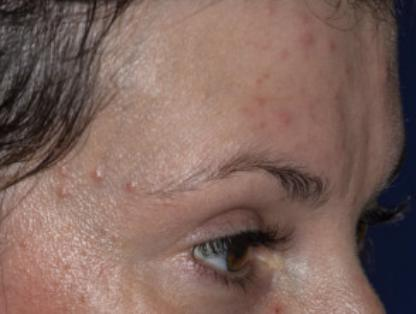

In [5]:
from PIL import Image, ImageOps
import os

# target_size = (224, 224) #target size

# Preprocess function to resize
def preprocess_image(image_path):
    image = Image.open(image_path)
    # image = image.resize(target_size, Image.LANCZOS)
    # image = ImageOps.grayscale(image)
    return image

# Example usage of the preprocess function
image_path = '/home/iambrink/Acne-21/test/images/01F3MMVYT4SJ23G9XQQ3S8BKNE_jpeg.rf.5baee614d965f81a1073e541414be2f2.jpg'
preprocessed_image = preprocess_image(image_path)
display(preprocessed_image)#show the preprocesed image for google colab (.show() is used also sometimes)

In [6]:
import os
import matplotlib.pyplot as plt

# Path to the labels directory
train_labels = '/home/iambrink/Acne-21/train/labels'
test_labels = '/home/iambrink/Acne-21/test/labels'
valid_labels = '/home/iambrink/Acne-21/valid/labels'
data_yaml = '/home/iambrink/Acne-21/data.yaml'

# List of label names corresponding to label numbers
label_names = ['blackheads', 'dark spot', 'nodules', 'papules', 'pustules', 'whiteheads']

In [7]:
def plot_label_distribution(labels_dir, label_names, plot_size=(8, 4)):
    """
    Plots the distribution of labels within a given directory of label files.

    Args:
    labels_dir (str): The directory path where label files are stored.
    label_names (list): A list of label names corresponding to label indices.
    plot_size (tuple): A tuple (width, height) specifying the size of the plot in inches.
    """
    # Initialize a dictionary to count the frequency of each label
    label_counts = {name: 0 for name in label_names}

    image_num = 0

    # Read each file in the directory
    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            image_num += 1
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, 'r') as file:
                for line in file:
                    label_index = int(line.split()[0])  # The first element in each line is the label index
                    label_counts[label_names[label_index]] += 1  # Increment the count for the corresponding label name

    # Plotting the label distribution
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    plt.figure(figsize=plot_size)
    plt.bar(labels, counts, color='blue')
    plt.xlabel('Labels')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Labels in "{get_set(labels_dir).capitalize()}" Set')
    plt.xticks(rotation=45)  # Rotate labels to improve readability
    plt.show()

    print(f"Number of images: {image_num}")

def get_set(path):
    """
    Extracts the last non-empty word from a string of words separated by slashes.

    Args:
    path (str): The input string path with words separated by slashes.

    Returns:
    str: The last non-empty word in the path.
    """
    # Split the string by slashes
    parts = path.split('/')
    # Filter out any empty strings that result from trailing slashes
    parts = [part for part in parts if part]
    # Return the last element of the list if it exists, otherwise return an empty string
    return parts[-2] if parts else ''

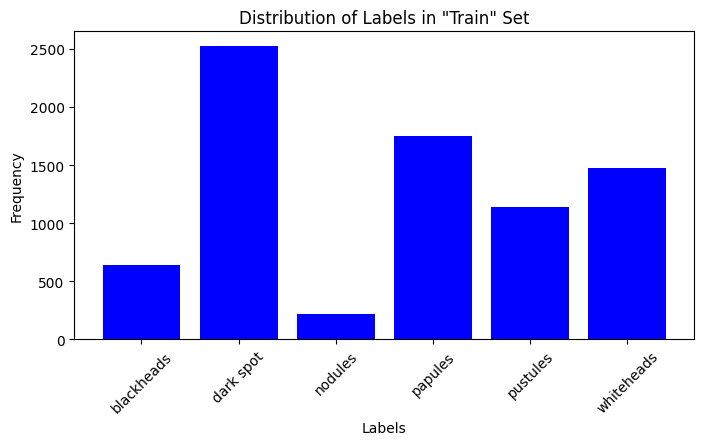

Number of images: 966


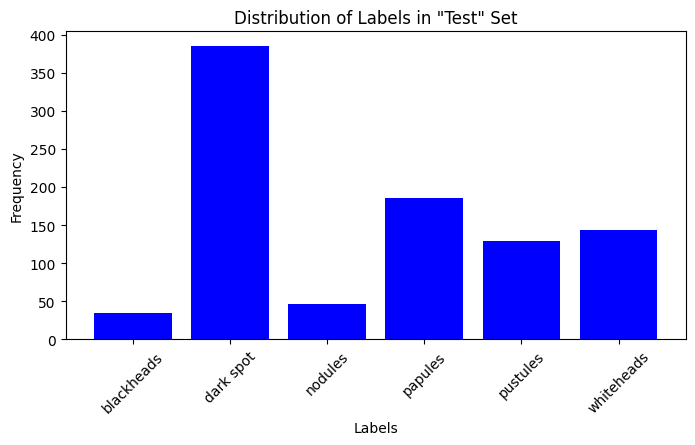

Number of images: 92


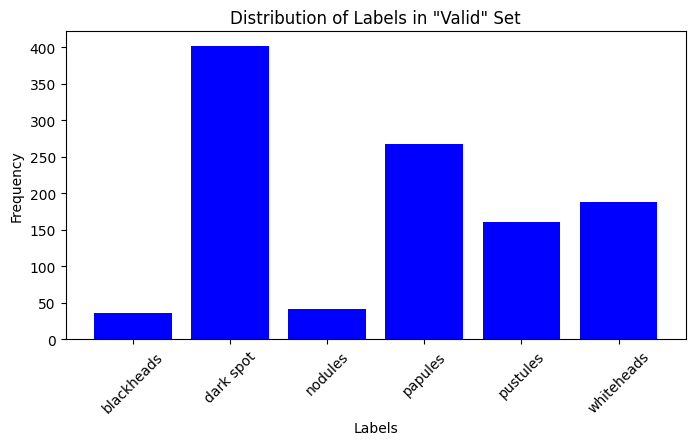

Number of images: 197


In [8]:
# Example usage:
label_names = ['blackheads', 'dark spot', 'nodules', 'papules', 'pustules', 'whiteheads']
plot_label_distribution('/home/iambrink/Acne-21/train/labels', label_names)
plot_label_distribution('/home/iambrink/Acne-21/test/labels', label_names)
plot_label_distribution('/home/iambrink/Acne-21/valid/labels', label_names)

In [9]:
print(data_yaml)

/home/iambrink/Acne-21/data.yaml


In [10]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [11]:
import tensorflow as tf

# Check for GPU availability
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:

# from ultralytics import YOLO

# # Load a pretrained YOLO model (recommended for training)
# model = YOLO('yolov8n.pt')
# data_yaml = '/home/iambrink/Acne-21/data.yaml'
# # Train the model with TensorBoard logging
# results = model.train(data=data_yaml, epochs=200, imgsz=512, iou=.5, verbose=True)

# # Evaluate the model's performance on the validation set
# results = model.val()

In [1]:
# from ultralytics import YOLO

# # Load a pretrained YOLO model (recommended for training)
# model = YOLO('yolov8n.pt')
# data_yaml = '/home/iambrink/Acne-21/data.yaml'

# # Train the model with TensorBoard logging and increased verbosity
# results = model.train(
#     data=data_yaml,
#     epochs=900,
#     imgsz=512,
#  # Include data augmentations
#     # verbose=True,
#     patience=300,
# )

# # Evaluate the model's performance on the validation set
# results = model.val()


New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/iambrink/Acne-21/data.yaml, epochs=900, time=None, patience=300, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train31, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

/home/iambrink/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
train: Scanning /home/iambrink/Acne-21/Acne-21/train/labels.cache... 966 images, 0 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
val: Scanning /home/iambrink/Acne-21/Acne-21/valid/labels.cache... 197 images, 3 backgrounds, 0 corrupt: 100%|██████████| 197/197 [00:00<?, ?it/s]


Plotting labels to runs/detect/train31/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train31
Starting training for 900 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/61 [00:00<?, ?it/s]/home/iambrink/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/900      1.72G      3.008      4.498      1.507        157        512: 100%|██████████| 61/61 [00:05<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.02it/s]

                   all        197       1097    0.00545      0.247     0.0272    0.00858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/900      1.75G      2.642       3.27      1.299         81        512: 100%|██████████| 61/61 [00:03<00:00, 15.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.79it/s]

                   all        197       1097    0.00198     0.0871    0.00408    0.00128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/900      1.47G      2.588      3.152      1.275        208        512:  20%|█▉        | 12/61 [00:00<00:03, 15.08it/s]


KeyboardInterrupt: 

In [ ]:
import nvidia_smi

# Initialize NVML
nvidia_smi.nvmlInit()

# Get the handle of the GPU you want to control (assuming only one GPU)
handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)

# Set the power limit in milliwatts (mW)
power_limit_mw = 180000  # Example: setting a power limit of 180 watts

# Set the power limit for the GPU
nvidia_smi.nvmlDeviceSetPowerManagementLimit(handle, power_limit_mw)

# Close NVML
nvidia_smi.nvmlShutdown()


In [1]:
from ultralytics import YOLO

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')
data_yaml = '/home/iambrink/Acne-21/data.yaml'

# Configure data augmentations
augmentations = [
    {'type': 'RandomCrop', 'size': 0.5},
    {'type': 'RandomFlip', 'p': 0.5},
    {'type': 'RandomRotate', 'angle': 10},
    # Add more augmentations as needed
]

# Train the model with TensorBoard logging and optimizations
results = model.train(
    data=data_yaml,
    epochs=900,
    imgsz=512,
    verbose=True,
    patience=0,
)

# Evaluate the model's performance on the validation set
results = model.val()


New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/iambrink/Acne-21/data.yaml, epochs=900, time=None, patience=0, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train33, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

/home/iambrink/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
train: Scanning /home/iambrink/Acne-21/Acne-21/train/labels.cache... 966 images, 0 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:00<?, ?it/s]
val: Scanning /home/iambrink/Acne-21/Acne-21/valid/labels.cache... 197 images, 3 backgrounds, 0 corrupt: 100%|██████████| 197/197 [00:00<?, ?it/s]


Plotting labels to runs/detect/train33/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train33
Starting training for 900 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/61 [00:00<?, ?it/s]/home/iambrink/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/900      1.72G      3.008      4.498      1.507        157        512: 100%|██████████| 61/61 [00:04<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.20it/s]

                   all        197       1097    0.00545      0.247     0.0272    0.00858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/900      1.75G      2.642       3.27      1.299         81        512: 100%|██████████| 61/61 [00:03<00:00, 16.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097    0.00198     0.0871    0.00408    0.00128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/900      2.24G        2.6       3.08      1.281         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.10it/s]

                   all        197       1097       0.23     0.0506     0.0309    0.00924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/900       1.8G      2.597      2.967       1.26         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.00it/s]

                   all        197       1097      0.174    0.00166   0.000877   0.000355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/900      1.67G      2.568      2.925      1.249        104        512: 100%|██████████| 61/61 [00:03<00:00, 17.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.81it/s]

                   all        197       1097     0.0571      0.123     0.0394     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/900      1.81G      2.538      2.758      1.238        116        512: 100%|██████████| 61/61 [00:03<00:00, 16.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.01it/s]

                   all        197       1097     0.0713      0.114     0.0467      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/900       1.8G      2.495      2.697      1.228         92        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.16it/s]

                   all        197       1097     0.0796      0.169     0.0593     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/900      1.72G      2.464      2.612      1.234         42        512: 100%|██████████| 61/61 [00:03<00:00, 17.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]

                   all        197       1097      0.136      0.129     0.0634      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/900      1.79G      2.479      2.579      1.226         73        512: 100%|██████████| 61/61 [00:03<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.63it/s]

                   all        197       1097      0.089       0.17     0.0587     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/900      1.64G      2.454      2.516      1.224        115        512: 100%|██████████| 61/61 [00:03<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097      0.194      0.151     0.0762     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/900      1.61G      2.406      2.486      1.199         98        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        197       1097      0.174      0.138       0.08     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/900      1.94G      2.458      2.475      1.217         54        512: 100%|██████████| 61/61 [00:03<00:00, 16.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.41it/s]

                   all        197       1097       0.16      0.229     0.0973     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/900      1.67G       2.42      2.411      1.205         53        512: 100%|██████████| 61/61 [00:03<00:00, 15.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.50it/s]

                   all        197       1097      0.136      0.179     0.0775     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/900      1.86G      2.396      2.366      1.208         43        512: 100%|██████████| 61/61 [00:03<00:00, 15.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]

                   all        197       1097       0.14      0.196     0.0825      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/900      1.67G      2.405      2.424      1.214         55        512: 100%|██████████| 61/61 [00:03<00:00, 16.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.41it/s]

                   all        197       1097      0.114      0.125     0.0768     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/900      1.76G      2.381      2.348      1.192         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]

                   all        197       1097      0.141      0.192     0.0997     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/900      1.65G      2.373       2.32      1.191         79        512: 100%|██████████| 61/61 [00:03<00:00, 16.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]

                   all        197       1097        0.2        0.2      0.093     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/900      1.79G      2.374      2.276      1.203         30        512: 100%|██████████| 61/61 [00:03<00:00, 17.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.35it/s]

                   all        197       1097      0.103      0.216      0.101     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/900      1.67G      2.408      2.311      1.191         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]

                   all        197       1097      0.121      0.209     0.0937     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/900      1.64G      2.354      2.284       1.19         85        512: 100%|██████████| 61/61 [00:03<00:00, 17.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]

                   all        197       1097      0.118      0.158     0.0854     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/900      1.69G      2.367      2.223      1.193         94        512: 100%|██████████| 61/61 [00:03<00:00, 15.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.78it/s]

                   all        197       1097      0.163       0.16     0.0936     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/900      1.67G       2.37      2.251      1.186         93        512: 100%|██████████| 61/61 [00:03<00:00, 16.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]

                   all        197       1097      0.323      0.166     0.0972      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/900      1.68G      2.356      2.238      1.176        104        512: 100%|██████████| 61/61 [00:03<00:00, 17.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]

                   all        197       1097      0.137      0.187      0.094     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/900      1.79G      2.321      2.184      1.168         80        512: 100%|██████████| 61/61 [00:03<00:00, 16.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]

                   all        197       1097      0.181      0.195      0.113     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/900       1.5G      2.362      2.241      1.193         79        512: 100%|██████████| 61/61 [00:04<00:00, 15.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.00it/s]

                   all        197       1097       0.12      0.218      0.107     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/900      1.84G      2.332      2.167      1.188         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]

                   all        197       1097      0.148      0.189      0.106     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/900      1.78G      2.335      2.183       1.18         87        512: 100%|██████████| 61/61 [00:03<00:00, 17.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]

                   all        197       1097      0.151      0.232      0.111     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/900      1.48G      2.313      2.164      1.179         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        197       1097      0.155      0.221     0.0961     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/900      1.72G      2.313      2.131      1.184         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.99it/s]

                   all        197       1097      0.171      0.205      0.118     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/900      1.84G      2.329      2.125      1.181         91        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097      0.214      0.187      0.108     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/900      1.67G      2.308      2.115       1.19         60        512: 100%|██████████| 61/61 [00:03<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097       0.15      0.191      0.113     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/900      1.75G      2.308      2.104      1.162         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.27it/s]

                   all        197       1097      0.167      0.209      0.101     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/900       1.5G      2.315       2.09      1.185        120        512: 100%|██████████| 61/61 [00:03<00:00, 17.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097      0.134      0.227     0.0963     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/900       1.8G      2.327      2.086      1.171        138        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.59it/s]

                   all        197       1097      0.173      0.194      0.103     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/900      1.67G      2.311      2.082      1.187         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        197       1097      0.139      0.167     0.0947     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/900      1.87G      2.319       2.06      1.171         38        512: 100%|██████████| 61/61 [00:03<00:00, 18.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]

                   all        197       1097      0.137      0.209      0.107     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/900      1.83G      2.292      2.072      1.175         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097      0.174       0.17      0.114      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/900       1.5G       2.29      2.034      1.173         75        512: 100%|██████████| 61/61 [00:03<00:00, 18.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]

                   all        197       1097      0.159      0.192       0.11     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/900      1.61G      2.285      2.016      1.159         59        512: 100%|██████████| 61/61 [00:03<00:00, 18.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.81it/s]

                   all        197       1097      0.156      0.213      0.116     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/900      1.81G      2.274      2.008      1.165         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]

                   all        197       1097      0.156      0.186      0.108     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/900       1.5G      2.261      2.008      1.163         97        512: 100%|██████████| 61/61 [00:03<00:00, 17.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]

                   all        197       1097      0.168      0.185      0.107     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/900      1.64G      2.282      1.994      1.165        100        512: 100%|██████████| 61/61 [00:03<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]

                   all        197       1097      0.235      0.184       0.11     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/900      1.94G      2.296      2.005      1.162         56        512: 100%|██████████| 61/61 [00:03<00:00, 18.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]

                   all        197       1097      0.168      0.229      0.111     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/900      1.64G      2.278      1.992      1.179         56        512: 100%|██████████| 61/61 [00:03<00:00, 18.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.33it/s]

                   all        197       1097      0.163      0.212      0.119     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/900       1.6G      2.248      1.949      1.149        105        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.85it/s]

                   all        197       1097      0.184       0.22      0.124     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/900      1.92G      2.238       1.92      1.162         97        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.48it/s]

                   all        197       1097      0.172      0.193      0.113     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/900      1.74G      2.263      1.956      1.175         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]

                   all        197       1097      0.145      0.219      0.116     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/900       2.1G      2.256      1.936      1.149         30        512: 100%|██████████| 61/61 [00:03<00:00, 16.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]

                   all        197       1097      0.182      0.197      0.106     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/900      1.97G      2.254      1.914      1.151         91        512: 100%|██████████| 61/61 [00:03<00:00, 18.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.91it/s]

                   all        197       1097      0.184      0.182      0.106     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/900       1.8G      2.233      1.893      1.159         91        512: 100%|██████████| 61/61 [00:03<00:00, 17.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]

                   all        197       1097      0.158      0.211      0.117     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/900       1.8G      2.219      1.882       1.15         49        512: 100%|██████████| 61/61 [00:03<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.59it/s]

                   all        197       1097      0.149      0.197      0.113     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/900      1.48G      2.228      1.919      1.142         69        512: 100%|██████████| 61/61 [00:03<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]

                   all        197       1097      0.183      0.194      0.116     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/900      1.64G      2.225      1.914      1.144        124        512: 100%|██████████| 61/61 [00:03<00:00, 18.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]

                   all        197       1097      0.161      0.218      0.118     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/900      2.05G      2.209      1.863      1.149        119        512: 100%|██████████| 61/61 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.00it/s]

                   all        197       1097      0.191       0.18       0.12      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/900      1.85G      2.211      1.881      1.149         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.168      0.196      0.111     0.0384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/900      1.93G      2.247      1.885      1.141         54        512: 100%|██████████| 61/61 [00:03<00:00, 16.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.163      0.205      0.114     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/900      1.83G      2.206      1.842      1.141         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.187      0.201      0.127     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/900       1.6G      2.224      1.872      1.145         87        512: 100%|██████████| 61/61 [00:03<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]

                   all        197       1097      0.163      0.204      0.127     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/900       1.5G      2.209      1.857      1.157         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]

                   all        197       1097      0.194      0.189      0.126     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/900      1.79G      2.197      1.817      1.141         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]

                   all        197       1097      0.157       0.22      0.116     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/900      1.76G      2.206      1.819      1.131         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097      0.173      0.226      0.127     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/900      1.78G      2.188      1.821      1.128         87        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097      0.165      0.194       0.12     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/900      1.79G      2.206       1.83      1.145         44        512: 100%|██████████| 61/61 [00:03<00:00, 16.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.82it/s]

                   all        197       1097      0.185      0.216      0.126       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/900      2.05G      2.183      1.801      1.147         51        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.67it/s]

                   all        197       1097      0.219      0.176      0.125     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/900      1.97G      2.162      1.757      1.127         38        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]

                   all        197       1097      0.186      0.206      0.124     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/900      1.89G      2.178      1.794      1.132         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.214      0.171      0.123     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/900      1.63G      2.157       1.76      1.129         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]

                   all        197       1097      0.173      0.207      0.126     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/900      1.75G      2.169      1.763      1.136         97        512: 100%|██████████| 61/61 [00:03<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097      0.194      0.183      0.114      0.038



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/900      1.96G      2.167      1.734      1.137         47        512: 100%|██████████| 61/61 [00:03<00:00, 17.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.66it/s]

                   all        197       1097       0.18      0.223       0.12      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/900      1.75G      2.161      1.764      1.131         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.63it/s]

                   all        197       1097      0.184      0.192      0.117     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/900      1.69G      2.154      1.677      1.127         49        512: 100%|██████████| 61/61 [00:03<00:00, 16.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]

                   all        197       1097      0.216      0.178      0.112     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/900      1.71G       2.15      1.723      1.129         95        512: 100%|██████████| 61/61 [00:03<00:00, 16.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.65it/s]

                   all        197       1097      0.177      0.226       0.12     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/900      1.78G      2.141      1.703      1.129         67        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        197       1097      0.169      0.228      0.115      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/900      1.83G      2.161        1.7      1.122        117        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097      0.188      0.183      0.122     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/900      1.75G      2.117      1.668      1.116         72        512: 100%|██████████| 61/61 [00:03<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]

                   all        197       1097      0.149       0.19      0.109     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/900      1.79G      2.143      1.672      1.119         61        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]

                   all        197       1097       0.16      0.195      0.111     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/900       1.8G      2.128      1.689      1.116         60        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.84it/s]

                   all        197       1097      0.164      0.206      0.123     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/900       1.6G      2.132       1.66      1.113         98        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]

                   all        197       1097      0.168      0.196      0.135     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/900      1.87G      2.109      1.668      1.114         60        512: 100%|██████████| 61/61 [00:03<00:00, 16.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.40it/s]

                   all        197       1097      0.149      0.167      0.101     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/900      1.58G      2.126      1.676      1.109         82        512: 100%|██████████| 61/61 [00:03<00:00, 18.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.89it/s]

                   all        197       1097       0.18      0.214      0.123     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/900      1.68G      2.118      1.658      1.102         51        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]

                   all        197       1097      0.165      0.218      0.118     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/900      1.77G      2.089      1.604      1.109         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.85it/s]

                   all        197       1097      0.185      0.186      0.115     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/900      1.65G      2.087      1.602      1.104        112        512: 100%|██████████| 61/61 [00:03<00:00, 17.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]

                   all        197       1097      0.168      0.181      0.123     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/900      1.98G      2.107      1.634      1.098         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.46it/s]

                   all        197       1097       0.17      0.202      0.115     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/900      1.96G      2.098      1.596      1.114        130        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.28it/s]

                   all        197       1097      0.187      0.195      0.119       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/900      1.81G      2.094      1.602      1.099         49        512: 100%|██████████| 61/61 [00:03<00:00, 17.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.23it/s]

                   all        197       1097      0.187      0.186      0.123     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/900      1.56G      2.082      1.624      1.095         44        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.28it/s]

                   all        197       1097       0.16      0.211      0.118     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/900      1.76G      2.083      1.587      1.112         96        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.32it/s]

                   all        197       1097      0.148      0.189      0.105     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/900      1.77G      2.072      1.584      1.094         64        512: 100%|██████████| 61/61 [00:03<00:00, 16.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.91it/s]

                   all        197       1097       0.18      0.214      0.122     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/900      1.66G      2.056      1.557      1.083         58        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.174      0.221      0.128     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/900      1.72G      2.063      1.574      1.095         43        512: 100%|██████████| 61/61 [00:03<00:00, 17.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.255      0.189      0.138     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/900      1.77G      2.059       1.55      1.093         69        512: 100%|██████████| 61/61 [00:03<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097      0.172      0.225      0.116     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/900      1.63G       2.03      1.522      1.087        102        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]

                   all        197       1097       0.18      0.208       0.12     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/900      1.82G       2.05      1.519      1.096         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]

                   all        197       1097      0.165       0.21       0.11     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/900      1.79G      2.042      1.515      1.099         71        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]

                   all        197       1097      0.175      0.187      0.119     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/900      1.64G      2.039      1.552      1.086         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]

                   all        197       1097      0.205      0.192      0.123     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/900       1.5G      2.039      1.552      1.097         62        512: 100%|██████████| 61/61 [00:03<00:00, 17.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]

                   all        197       1097      0.182      0.198      0.122     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/900      1.61G      2.045      1.568      1.083         93        512: 100%|██████████| 61/61 [00:03<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.51it/s]

                   all        197       1097      0.181      0.204      0.122     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/900      1.67G      2.026      1.503      1.076         52        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]

                   all        197       1097       0.16      0.195      0.116     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/900      2.01G      2.004      1.489      1.076         72        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097      0.159      0.211      0.116     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/900      1.84G      2.018      1.494      1.087         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.94it/s]

                   all        197       1097       0.17       0.23      0.117     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/900      1.85G      2.033      1.497      1.081         99        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.55it/s]

                   all        197       1097      0.217       0.19      0.125     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/900      1.67G      2.018      1.478      1.082         87        512: 100%|██████████| 61/61 [00:03<00:00, 17.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]

                   all        197       1097      0.171      0.186       0.11     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/900      1.64G      2.021      1.476      1.088         79        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        197       1097      0.183      0.186      0.111     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/900       1.5G      1.994      1.476      1.072         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

                   all        197       1097      0.169      0.202      0.123     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/900      1.82G      2.013      1.452      1.069         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.65it/s]

                   all        197       1097      0.187      0.193      0.125     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/900      1.71G      2.025       1.48      1.084         42        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]

                   all        197       1097      0.163      0.173      0.112     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/900      1.48G      1.999      1.454       1.08         47        512: 100%|██████████| 61/61 [00:03<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.96it/s]

                   all        197       1097      0.233        0.2      0.133     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/900      1.64G      2.002      1.461      1.081         60        512: 100%|██████████| 61/61 [00:03<00:00, 17.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.04it/s]

                   all        197       1097      0.243      0.164      0.114     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/900      1.64G       1.97      1.451      1.082         58        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.168      0.214      0.118     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/900      1.69G      1.979      1.432       1.07         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.85it/s]

                   all        197       1097      0.175      0.186      0.109     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/900      1.81G      1.991      1.443      1.075         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.162      0.208      0.107     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/900      1.65G      1.959       1.44      1.062        100        512: 100%|██████████| 61/61 [00:03<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]

                   all        197       1097      0.185      0.207      0.119     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/900      1.57G       1.95      1.405      1.059         58        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097       0.16      0.223      0.118     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/900      1.68G      1.982      1.412      1.069         83        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]

                   all        197       1097      0.159      0.197      0.108     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/900      1.84G      1.951      1.389       1.06         76        512: 100%|██████████| 61/61 [00:03<00:00, 17.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097      0.155      0.204      0.121     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/900      1.65G      1.963      1.408      1.066         32        512: 100%|██████████| 61/61 [00:03<00:00, 17.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]

                   all        197       1097      0.208      0.176      0.122     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/900      1.72G      1.934      1.357      1.049         75        512: 100%|██████████| 61/61 [00:03<00:00, 17.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.91it/s]

                   all        197       1097      0.199      0.206      0.123       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/900      1.64G      1.978      1.402      1.053         22        512: 100%|██████████| 61/61 [00:03<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.92it/s]

                   all        197       1097       0.22      0.197       0.12       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/900      1.91G       1.92      1.343      1.057         96        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]

                   all        197       1097      0.196      0.202      0.124     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/900       1.6G       1.94      1.375       1.06         41        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]


                   all        197       1097      0.192      0.206      0.113     0.0347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/900      1.76G      1.919      1.384      1.057        100        512: 100%|██████████| 61/61 [00:03<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.82it/s]

                   all        197       1097      0.205      0.192      0.119     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/900       1.5G      1.953        1.4      1.068         39        512: 100%|██████████| 61/61 [00:03<00:00, 18.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.20it/s]

                   all        197       1097      0.184      0.214      0.122     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/900      1.76G      1.885      1.352      1.047         71        512: 100%|██████████| 61/61 [00:03<00:00, 16.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.96it/s]

                   all        197       1097      0.196       0.18      0.122     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/900      1.69G      1.929      1.354      1.046         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.15it/s]

                   all        197       1097       0.18      0.188      0.113     0.0371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/900      1.86G      1.934      1.382      1.056         87        512: 100%|██████████| 61/61 [00:03<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.69it/s]

                   all        197       1097      0.179      0.173      0.106     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/900      1.76G      1.887      1.338       1.04         61        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.161      0.212      0.109     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/900      1.93G      1.902      1.316      1.046         44        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]

                   all        197       1097      0.164      0.165      0.106     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/900       1.6G      1.927      1.361      1.055         30        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.71it/s]

                   all        197       1097      0.135      0.217      0.107     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/900      1.66G      1.906      1.329      1.054         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]

                   all        197       1097      0.172      0.194      0.109     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/900      1.75G      1.862        1.3      1.034        100        512: 100%|██████████| 61/61 [00:03<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.84it/s]


                   all        197       1097      0.213      0.178      0.115     0.0384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/900      1.95G      1.891      1.304      1.045         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097      0.201      0.179      0.111     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/900      2.12G      1.886      1.315       1.04         58        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]

                   all        197       1097      0.147      0.195      0.102     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/900       1.8G        1.9      1.297       1.04         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]

                   all        197       1097      0.167      0.217      0.118     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/900      1.59G      1.888      1.308      1.045         43        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]

                   all        197       1097      0.173      0.185      0.102     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/900       2.1G      1.896      1.322      1.052         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]

                   all        197       1097      0.167      0.203      0.107     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/900      1.64G      1.855      1.286       1.03         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]

                   all        197       1097      0.167      0.204      0.111     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/900       1.5G      1.877      1.305      1.033         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]

                   all        197       1097       0.17      0.225      0.112     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/900      1.86G      1.878      1.299      1.045         32        512: 100%|██████████| 61/61 [00:03<00:00, 16.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097      0.177      0.189      0.114     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/900      1.75G      1.866      1.273      1.034        115        512: 100%|██████████| 61/61 [00:03<00:00, 18.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]

                   all        197       1097       0.18      0.172      0.103      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/900      1.85G      1.881      1.288      1.041         92        512: 100%|██████████| 61/61 [00:03<00:00, 17.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.74it/s]

                   all        197       1097       0.15      0.195     0.0986      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/900      1.65G      1.844      1.262      1.025         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]

                   all        197       1097      0.172      0.205      0.113      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/900      2.19G      1.852      1.259      1.041        158        512: 100%|██████████| 61/61 [00:03<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.42it/s]

                   all        197       1097      0.157      0.177       0.11      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/900      1.76G      1.818      1.221      1.023         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.29it/s]

                   all        197       1097      0.174      0.209      0.117     0.0364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/900      1.65G      1.809      1.232       1.03         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.166      0.187      0.112     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/900      1.77G      1.834      1.242       1.04         38        512: 100%|██████████| 61/61 [00:03<00:00, 18.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.13it/s]

                   all        197       1097      0.149      0.217      0.103     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/900      1.79G      1.826      1.248      1.034         47        512: 100%|██████████| 61/61 [00:03<00:00, 17.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]

                   all        197       1097      0.175      0.192      0.117     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/900      1.76G      1.838      1.229       1.03         87        512: 100%|██████████| 61/61 [00:03<00:00, 18.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.21it/s]

                   all        197       1097      0.164      0.197       0.11     0.0356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/900       1.8G      1.847      1.239      1.036        164        512: 100%|██████████| 61/61 [00:03<00:00, 17.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097      0.184      0.221      0.115     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/900      1.93G      1.823      1.232      1.032         68        512: 100%|██████████| 61/61 [00:03<00:00, 18.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.64it/s]

                   all        197       1097      0.206      0.194      0.114     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/900      1.79G      1.824      1.237      1.024         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.238      0.165      0.118      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/900      1.71G      1.807      1.218      1.023         31        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.30it/s]

                   all        197       1097      0.205      0.178      0.115      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/900      1.82G      1.805      1.216      1.023         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.64it/s]

                   all        197       1097      0.189      0.186      0.123     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/900       1.5G      1.832      1.257       1.03         76        512: 100%|██████████| 61/61 [00:03<00:00, 18.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.85it/s]

                   all        197       1097      0.176      0.203      0.118     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/900      1.76G      1.812      1.219      1.024         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]

                   all        197       1097      0.149      0.194     0.0968     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/900      1.59G      1.801      1.212      1.022         56        512: 100%|██████████| 61/61 [00:03<00:00, 18.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.55it/s]

                   all        197       1097      0.172      0.194       0.11     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/900      1.98G      1.796      1.203      1.012         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.198      0.181      0.112     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/900      1.67G        1.8      1.222      1.013         76        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097      0.154      0.209      0.112     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/900      1.77G       1.79      1.211      1.023         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]

                   all        197       1097      0.167      0.195      0.114     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/900      1.88G      1.803      1.198      1.013         53        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.53it/s]

                   all        197       1097      0.145      0.232      0.108     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/900      1.78G      1.787      1.198      1.019         99        512: 100%|██████████| 61/61 [00:03<00:00, 17.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097      0.163      0.184      0.102     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/900      1.68G      1.795      1.202      1.024         63        512: 100%|██████████| 61/61 [00:03<00:00, 15.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]

                   all        197       1097      0.179      0.205      0.113     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/900      1.83G       1.77      1.176      1.019         78        512: 100%|██████████| 61/61 [00:03<00:00, 16.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.33it/s]

                   all        197       1097       0.22      0.161      0.126     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/900      1.77G       1.77      1.162      1.007         81        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.89it/s]

                   all        197       1097      0.208      0.174      0.113     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/900      2.02G      1.766      1.161       1.01         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097      0.158      0.188      0.117     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/900      1.81G      1.785      1.194      1.022         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]

                   all        197       1097      0.179      0.173      0.114     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/900       1.5G      1.779      1.203      1.017         71        512: 100%|██████████| 61/61 [00:03<00:00, 17.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.91it/s]

                   all        197       1097      0.153      0.212       0.11     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/900      1.48G       1.75      1.178      1.011         35        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]

                   all        197       1097      0.136      0.199      0.105     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/900      1.91G      1.783      1.183      1.009         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]

                   all        197       1097      0.149      0.168      0.101     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/900      1.77G      1.758      1.146      1.004         91        512: 100%|██████████| 61/61 [00:03<00:00, 17.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.65it/s]

                   all        197       1097      0.171       0.17      0.108     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/900      1.88G      1.766      1.166      1.017         60        512: 100%|██████████| 61/61 [00:03<00:00, 16.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.98it/s]

                   all        197       1097       0.18      0.188      0.108      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/900      1.48G      1.755      1.164      1.009        171        512: 100%|██████████| 61/61 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]

                   all        197       1097      0.141       0.21      0.107     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/900      1.67G      1.778      1.182      1.006        119        512: 100%|██████████| 61/61 [00:03<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097      0.163      0.193       0.11     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/900       1.5G      1.761      1.146      1.008         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        197       1097      0.162      0.191      0.113      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/900       1.5G      1.768      1.163      1.004         41        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]

                   all        197       1097      0.173      0.177      0.114     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/900      1.75G      1.735       1.15      1.006         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]

                   all        197       1097      0.151      0.209      0.104     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/900      1.72G      1.699      1.124      1.001         41        512: 100%|██████████| 61/61 [00:03<00:00, 17.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]

                   all        197       1097      0.152      0.179      0.103     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/900      1.77G      1.716      1.121      1.004         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.33it/s]

                   all        197       1097      0.146      0.165     0.0965       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/900      1.74G      1.722      1.142      1.005         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.00it/s]

                   all        197       1097      0.132      0.179        0.1     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/900      1.91G      1.716      1.124     0.9948         41        512: 100%|██████████| 61/61 [00:03<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.16it/s]

                   all        197       1097       0.18      0.196       0.12     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/900      1.68G      1.731      1.136     0.9988         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.58it/s]

                   all        197       1097      0.158      0.194      0.105     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/900      1.62G       1.74      1.128     0.9993         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.54it/s]

                   all        197       1097      0.194      0.171      0.108     0.0361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/900      1.64G      1.731      1.122      1.001        103        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.51it/s]

                   all        197       1097      0.171      0.181      0.104     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/900      1.72G      1.716      1.121     0.9944         38        512: 100%|██████████| 61/61 [00:03<00:00, 17.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]

                   all        197       1097      0.151      0.176      0.103     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/900      1.87G      1.686      1.095     0.9915         79        512: 100%|██████████| 61/61 [00:03<00:00, 17.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097      0.176      0.184      0.114     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/900      1.82G      1.705      1.092      1.002         72        512: 100%|██████████| 61/61 [00:03<00:00, 16.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]

                   all        197       1097      0.136      0.175      0.104     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/900      1.77G      1.693      1.108     0.9948         79        512: 100%|██████████| 61/61 [00:03<00:00, 16.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097       0.14      0.219      0.109     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/900      1.76G      1.719       1.12     0.9944         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.18it/s]

                   all        197       1097      0.177      0.165      0.111     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/900      1.67G      1.704      1.094      0.993        140        512: 100%|██████████| 61/61 [00:03<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.13it/s]

                   all        197       1097      0.166      0.206      0.115     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/900      1.65G      1.681      1.084     0.9883         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.10it/s]

                   all        197       1097      0.191      0.191      0.106     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/900      1.73G      1.686      1.104     0.9867         40        512: 100%|██████████| 61/61 [00:03<00:00, 16.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]

                   all        197       1097      0.165      0.198        0.1     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/900      1.76G      1.679      1.092     0.9934         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.34it/s]

                   all        197       1097      0.167      0.207      0.118     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/900      1.77G      1.696      1.093     0.9933         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.70it/s]

                   all        197       1097      0.166      0.196      0.108     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/900      1.65G      1.691      1.093     0.9918         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.78it/s]

                   all        197       1097      0.168      0.152      0.105     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/900       1.8G      1.697        1.1     0.9957         73        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.93it/s]

                   all        197       1097       0.19      0.164      0.106     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/900      1.76G      1.683      1.102     0.9833         47        512: 100%|██████████| 61/61 [00:03<00:00, 17.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.21it/s]

                   all        197       1097       0.18      0.204      0.107      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/900      1.61G      1.689      1.094      0.994         88        512: 100%|██████████| 61/61 [00:03<00:00, 16.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.06it/s]

                   all        197       1097      0.172      0.183       0.11     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/900      1.75G      1.696      1.109     0.9853         92        512: 100%|██████████| 61/61 [00:03<00:00, 17.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.184      0.174      0.114     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/900      1.82G      1.705      1.093     0.9866         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.24it/s]

                   all        197       1097       0.17      0.194      0.107     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/900      1.65G       1.68      1.084     0.9921         39        512: 100%|██████████| 61/61 [00:03<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]

                   all        197       1097      0.198      0.189      0.111     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/900      1.77G      1.661      1.076     0.9796         59        512: 100%|██████████| 61/61 [00:03<00:00, 15.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]

                   all        197       1097      0.156      0.175      0.102     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/900      1.78G      1.663      1.062     0.9882         92        512: 100%|██████████| 61/61 [00:03<00:00, 16.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]

                   all        197       1097      0.164      0.173     0.0979     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/900      1.96G      1.656      1.059     0.9816         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]

                   all        197       1097      0.143      0.206      0.106     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/900      1.84G      1.681      1.072     0.9882         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.155      0.221      0.112     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/900      2.02G      1.659      1.058     0.9853         81        512: 100%|██████████| 61/61 [00:03<00:00, 17.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097      0.169      0.188      0.104     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/900      1.83G      1.646      1.054     0.9867         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.78it/s]

                   all        197       1097      0.165      0.179       0.11     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/900      1.59G      1.661      1.054     0.9813        102        512: 100%|██████████| 61/61 [00:03<00:00, 18.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]

                   all        197       1097      0.185      0.168      0.112     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/900      1.65G      1.642      1.046     0.9771         86        512: 100%|██████████| 61/61 [00:03<00:00, 18.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.34it/s]

                   all        197       1097      0.171      0.163      0.107     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/900      1.79G      1.643      1.036      0.983        176        512: 100%|██████████| 61/61 [00:03<00:00, 18.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097       0.14      0.198      0.103     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/900      1.71G       1.67      1.052     0.9843         74        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.19it/s]

                   all        197       1097      0.178      0.199      0.116     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/900      1.65G      1.639      1.033     0.9791         86        512: 100%|██████████| 61/61 [00:03<00:00, 18.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.78it/s]

                   all        197       1097      0.168       0.18      0.108     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/900      1.64G      1.629      1.031      0.977         35        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.98it/s]

                   all        197       1097       0.17        0.2      0.106     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/900      1.82G      1.663      1.062     0.9695         68        512: 100%|██████████| 61/61 [00:03<00:00, 16.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]

                   all        197       1097      0.164      0.208      0.115     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/900       1.8G       1.62      1.029      0.976         33        512: 100%|██████████| 61/61 [00:03<00:00, 17.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]

                   all        197       1097      0.173       0.21      0.119     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/900      1.64G      1.606      1.023     0.9704         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.23it/s]

                   all        197       1097      0.168      0.181      0.115     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/900      1.66G      1.633      1.044     0.9744         55        512: 100%|██████████| 61/61 [00:03<00:00, 16.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.72it/s]

                   all        197       1097      0.156      0.177      0.103     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/900      1.77G       1.66      1.054     0.9809         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.68it/s]

                   all        197       1097      0.158      0.188      0.101     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/900      1.82G      1.649      1.047     0.9814         79        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]

                   all        197       1097      0.188      0.188      0.108      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/900      1.65G      1.649      1.053     0.9689        115        512: 100%|██████████| 61/61 [00:03<00:00, 17.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]

                   all        197       1097      0.177      0.185       0.11     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/900      1.72G      1.591      1.004     0.9697         75        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.32it/s]

                   all        197       1097      0.189      0.194      0.114     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/900      1.76G      1.613      1.016     0.9729         63        512: 100%|██████████| 61/61 [00:03<00:00, 18.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]

                   all        197       1097      0.166       0.21      0.111     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/900       1.8G       1.62      1.014     0.9598        109        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]


                   all        197       1097      0.161      0.193      0.107     0.0352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/900       1.6G      1.633      1.043     0.9747         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097       0.17      0.188      0.108     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/900      1.68G      1.603      1.018     0.9738        120        512: 100%|██████████| 61/61 [00:03<00:00, 16.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]

                   all        197       1097      0.192      0.171      0.109     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/900      2.07G      1.611      1.029     0.9608         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.83it/s]

                   all        197       1097      0.178       0.16      0.113     0.0358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/900      1.72G      1.562     0.9773      0.967         52        512: 100%|██████████| 61/61 [00:03<00:00, 18.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097       0.21      0.175      0.112     0.0364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/900      1.85G      1.597       1.01     0.9665         62        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]

                   all        197       1097      0.159      0.199      0.114      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/900      1.67G      1.598      1.008     0.9717         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.30it/s]

                   all        197       1097      0.171      0.178      0.108     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/900       1.8G      1.608      1.019      0.967         87        512: 100%|██████████| 61/61 [00:03<00:00, 17.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.35it/s]

                   all        197       1097      0.171      0.175     0.0977     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/900      1.64G        1.6      1.007     0.9681         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.69it/s]

                   all        197       1097      0.168       0.19        0.1     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/900      1.96G      1.599      1.018     0.9669         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.78it/s]


                   all        197       1097       0.18       0.17     0.0996      0.032

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/900       1.9G      1.588      1.004     0.9598         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.12it/s]


                   all        197       1097      0.195       0.18      0.114     0.0364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/900      1.86G      1.612      1.003     0.9614         61        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.76it/s]

                   all        197       1097      0.169      0.176     0.0992     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/900       1.5G      1.592      1.003     0.9598         79        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.19it/s]

                   all        197       1097       0.18      0.172      0.103     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/900       1.8G      1.618      1.018     0.9694         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.65it/s]

                   all        197       1097      0.166      0.198      0.105     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/900      2.02G      1.594     0.9983      0.968        104        512: 100%|██████████| 61/61 [00:03<00:00, 17.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.08it/s]

                   all        197       1097      0.151      0.199      0.107     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/900      1.78G      1.584     0.9736     0.9617        113        512: 100%|██████████| 61/61 [00:03<00:00, 16.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]

                   all        197       1097      0.152      0.182      0.101     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/900      1.68G       1.62      1.022     0.9718         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.41it/s]

                   all        197       1097      0.144      0.191      0.106      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/900      1.86G      1.573     0.9761     0.9665        104        512: 100%|██████████| 61/61 [00:03<00:00, 16.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.18it/s]

                   all        197       1097      0.166      0.163      0.101     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/900      1.79G      1.589      0.995     0.9609         66        512: 100%|██████████| 61/61 [00:03<00:00, 16.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]

                   all        197       1097      0.152      0.171     0.0965     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/900      1.64G      1.594      1.001     0.9629         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]


                   all        197       1097      0.151      0.189     0.0979     0.0317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/900      1.67G      1.569     0.9786     0.9679         53        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.11it/s]


                   all        197       1097      0.161      0.168      0.107      0.035

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/900      1.69G      1.564     0.9863      0.963         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.29it/s]

                   all        197       1097      0.159      0.185      0.118     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/900      1.84G      1.549     0.9701     0.9614         71        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.72it/s]


                   all        197       1097      0.173      0.169      0.114     0.0364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/900      1.67G      1.577     0.9803     0.9617         89        512: 100%|██████████| 61/61 [00:03<00:00, 16.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]

                   all        197       1097      0.152      0.163      0.107     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/900      1.78G      1.591      0.993     0.9659         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.53it/s]

                   all        197       1097      0.156      0.171      0.109     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/900      1.79G      1.567      0.979     0.9579         61        512: 100%|██████████| 61/61 [00:03<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.09it/s]


                   all        197       1097       0.18      0.178      0.115     0.0349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/900      1.74G      1.538     0.9626     0.9511         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.96it/s]

                   all        197       1097      0.148      0.173      0.105     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/900      1.75G      1.601     0.9978     0.9638         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]

                   all        197       1097      0.154      0.164      0.105     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/900      1.68G      1.557     0.9692      0.956         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.88it/s]


                   all        197       1097      0.152       0.21      0.104     0.0325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/900      1.84G      1.572      0.971     0.9633         27        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.184      0.161      0.108     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/900      2.02G      1.576     0.9679     0.9653         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.22it/s]


                   all        197       1097      0.176      0.181       0.11     0.0331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/900       1.5G      1.552     0.9812     0.9549         77        512: 100%|██████████| 61/61 [00:03<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]

                   all        197       1097      0.178      0.194      0.111     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/900      2.03G      1.566     0.9659      0.954         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.56it/s]

                   all        197       1097      0.173      0.181      0.111     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/900       1.5G      1.536      0.952     0.9589         52        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]

                   all        197       1097      0.171      0.168      0.107     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/900      2.05G      1.541     0.9404     0.9625        100        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.86it/s]


                   all        197       1097      0.218      0.172      0.115     0.0369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/900      1.65G       1.54     0.9565     0.9503         92        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]

                   all        197       1097      0.225      0.153      0.112     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/900      1.75G      1.551     0.9556     0.9481         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.43it/s]

                   all        197       1097      0.171      0.192      0.107     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/900       1.5G      1.551     0.9562     0.9528        107        512: 100%|██████████| 61/61 [00:03<00:00, 18.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        197       1097      0.189      0.201      0.109     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/900      2.04G      1.536     0.9409     0.9505         86        512: 100%|██████████| 61/61 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.50it/s]

                   all        197       1097      0.199      0.167      0.102      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/900      1.89G      1.547     0.9672     0.9561         69        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.57it/s]

                   all        197       1097      0.178       0.19      0.108     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/900      1.67G      1.538     0.9434     0.9509         74        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]

                   all        197       1097      0.177      0.176      0.114     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/900      1.78G      1.509     0.9159     0.9459         91        512: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.40it/s]

                   all        197       1097      0.164      0.159      0.106     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/900       1.8G      1.527     0.9314     0.9551         65        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]


                   all        197       1097      0.152      0.175      0.105     0.0338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/900      1.59G      1.515     0.9372     0.9517        138        512: 100%|██████████| 61/61 [00:03<00:00, 16.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        197       1097      0.148      0.194      0.103     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/900      1.81G       1.56     0.9681     0.9569        152        512: 100%|██████████| 61/61 [00:03<00:00, 17.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]

                   all        197       1097      0.149      0.173      0.102     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/900      2.23G      1.549     0.9534     0.9509         77        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]

                   all        197       1097      0.177      0.194      0.103     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/900      1.82G      1.537     0.9403     0.9464        104        512: 100%|██████████| 61/61 [00:03<00:00, 15.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]

                   all        197       1097       0.17      0.169      0.111     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/900      1.86G      1.517     0.9244     0.9419         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.60it/s]

                   all        197       1097      0.172      0.178      0.109     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/900      1.73G      1.528     0.9352      0.951        110        512: 100%|██████████| 61/61 [00:03<00:00, 16.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]

                   all        197       1097      0.165      0.173      0.106     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/900      1.76G      1.522     0.9299     0.9482         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.50it/s]

                   all        197       1097      0.163      0.171      0.101     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/900      1.63G      1.521     0.9351     0.9482         40        512: 100%|██████████| 61/61 [00:03<00:00, 17.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]

                   all        197       1097      0.203      0.147      0.103     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/900      1.68G      1.514     0.9161      0.949         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097      0.163      0.169     0.0996     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/900      1.78G      1.529     0.9322     0.9475        166        512: 100%|██████████| 61/61 [00:03<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]

                   all        197       1097      0.179      0.151      0.104     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/900      1.59G      1.504     0.9148     0.9495         73        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.33it/s]

                   all        197       1097      0.164      0.172      0.109     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/900      1.83G      1.507     0.9143      0.944         77        512: 100%|██████████| 61/61 [00:03<00:00, 16.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.58it/s]

                   all        197       1097       0.18       0.16      0.104     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/900      1.81G      1.489     0.9054     0.9424         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]

                   all        197       1097      0.176       0.17      0.105     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/900      1.61G      1.493     0.9174     0.9431         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]

                   all        197       1097      0.194      0.166       0.11      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/900      2.02G      1.516     0.9246      0.946         82        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.69it/s]

                   all        197       1097       0.17      0.168     0.0995     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/900      1.56G      1.497     0.9211     0.9504         32        512: 100%|██████████| 61/61 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.34it/s]

                   all        197       1097      0.152      0.188      0.105     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/900      2.19G      1.519     0.9214     0.9518         72        512: 100%|██████████| 61/61 [00:03<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.99it/s]

                   all        197       1097      0.189      0.154      0.104     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/900      2.03G      1.512     0.9176     0.9488        127        512: 100%|██████████| 61/61 [00:03<00:00, 17.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.198      0.181      0.115     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/900      1.88G      1.475     0.9049     0.9403         44        512: 100%|██████████| 61/61 [00:03<00:00, 16.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

                   all        197       1097      0.172      0.182      0.108     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/900      1.77G      1.479     0.8983     0.9409         53        512: 100%|██████████| 61/61 [00:03<00:00, 16.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.78it/s]


                   all        197       1097      0.171      0.195      0.103     0.0349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/900       1.5G      1.479     0.9074     0.9443         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]

                   all        197       1097      0.163      0.186      0.108     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/900      2.19G      1.517     0.9152     0.9458         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.65it/s]

                   all        197       1097      0.171      0.179      0.108     0.0349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/900      1.79G      1.498     0.9098     0.9432         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.40it/s]

                   all        197       1097      0.186      0.173      0.101     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/900       1.6G      1.483     0.8996     0.9449         60        512: 100%|██████████| 61/61 [00:03<00:00, 16.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.14it/s]

                   all        197       1097      0.173      0.188      0.104     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/900      1.88G      1.464     0.8874     0.9402         95        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.55it/s]

                   all        197       1097      0.156      0.193      0.102     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/900      1.76G      1.495     0.9071     0.9409         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097      0.168      0.175      0.107     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/900      1.68G      1.512     0.9215     0.9366        117        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.79it/s]


                   all        197       1097      0.184      0.175      0.115     0.0382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/900      1.64G      1.475     0.8944     0.9364         52        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.18it/s]

                   all        197       1097      0.167       0.17      0.108     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/900      1.76G      1.483     0.8959     0.9387         37        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.92it/s]

                   all        197       1097      0.153      0.192      0.106     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/900      1.65G      1.496     0.9072      0.942         47        512: 100%|██████████| 61/61 [00:03<00:00, 18.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]

                   all        197       1097       0.15      0.167      0.108     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/900       1.5G      1.494     0.9147     0.9388         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.24it/s]

                   all        197       1097       0.16      0.186      0.105     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/900      1.84G      1.501     0.9017     0.9454         88        512: 100%|██████████| 61/61 [00:03<00:00, 18.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]

                   all        197       1097      0.173      0.173      0.104     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/900      1.61G      1.473     0.8864     0.9357        109        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.14it/s]

                   all        197       1097       0.17      0.176      0.103     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/900      1.83G      1.474     0.8857     0.9384        109        512: 100%|██████████| 61/61 [00:03<00:00, 18.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.64it/s]

                   all        197       1097       0.16      0.187      0.101     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/900      1.67G      1.469     0.8963     0.9284         39        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.43it/s]

                   all        197       1097      0.166      0.173      0.103     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/900      1.57G      1.458     0.8973     0.9363         77        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]

                   all        197       1097      0.147      0.162     0.0964     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/900         2G       1.48     0.8829     0.9357         93        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.54it/s]

                   all        197       1097      0.156      0.179      0.104     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/900       1.5G      1.457     0.8839     0.9402         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]

                   all        197       1097      0.173      0.169      0.106     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/900      1.68G      1.505     0.9035     0.9367         58        512: 100%|██████████| 61/61 [00:04<00:00, 13.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097       0.18      0.177      0.102     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/900      1.65G       1.45     0.8644     0.9314         60        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097      0.191       0.17      0.106     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/900      1.63G      1.452     0.8791     0.9368        123        512: 100%|██████████| 61/61 [00:03<00:00, 17.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.189      0.168      0.107     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/900      1.65G      1.474     0.8823      0.938         83        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]

                   all        197       1097      0.178      0.156        0.1     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/900      1.77G      1.478     0.8904     0.9371         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.96it/s]

                   all        197       1097      0.153      0.173     0.0966     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/900      1.87G      1.457     0.8824     0.9323         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097      0.168      0.171      0.099     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/900      1.75G      1.466     0.8819     0.9316         66        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        197       1097      0.162      0.179      0.102     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/900      1.76G      1.446     0.8721      0.939         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.36it/s]

                   all        197       1097      0.168      0.158     0.0962      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/900      1.95G      1.496      0.889     0.9398         93        512: 100%|██████████| 61/61 [00:03<00:00, 16.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097      0.149      0.192     0.0985     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/900      1.67G       1.45     0.8652      0.929         98        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]

                   all        197       1097      0.175      0.185      0.107     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/900      1.78G      1.468     0.8798     0.9319         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.47it/s]

                   all        197       1097      0.183      0.165      0.107     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/900      1.67G      1.441     0.8599     0.9394         68        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]

                   all        197       1097      0.171      0.194      0.103     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/900      1.84G      1.477     0.8921     0.9402         55        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.79it/s]


                   all        197       1097      0.146      0.177     0.0954     0.0308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/900      1.81G      1.454      0.859      0.933         50        512: 100%|██████████| 61/61 [00:03<00:00, 18.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.11it/s]

                   all        197       1097      0.139      0.179     0.0933     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/900      1.96G      1.459     0.8767     0.9338         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.89it/s]

                   all        197       1097      0.156      0.178     0.0902     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/900      1.68G      1.447     0.8745     0.9271         79        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]

                   all        197       1097      0.148      0.157     0.0938     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/900      1.73G      1.477     0.8889     0.9291         81        512: 100%|██████████| 61/61 [00:03<00:00, 16.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]

                   all        197       1097      0.168       0.16     0.0964     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/900      1.62G      1.459     0.8677     0.9389         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]

                   all        197       1097       0.16      0.184      0.102      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/900      1.94G      1.471     0.8865     0.9364         41        512: 100%|██████████| 61/61 [00:03<00:00, 17.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.47it/s]

                   all        197       1097      0.168       0.16        0.1     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/900      1.82G      1.424     0.8552     0.9208         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.16it/s]

                   all        197       1097      0.146      0.192      0.102     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/900      1.66G      1.457     0.8631     0.9285         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.06it/s]


                   all        197       1097      0.153      0.173      0.103     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/900      1.78G      1.443     0.8804     0.9247         46        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]


                   all        197       1097      0.173      0.181     0.0995     0.0309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/900      1.79G       1.46     0.8717     0.9353        113        512: 100%|██████████| 61/61 [00:03<00:00, 18.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097      0.145      0.189      0.101     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/900      1.66G       1.46     0.8808     0.9304         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]

                   all        197       1097       0.18      0.178      0.105     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/900      1.75G      1.449     0.8601     0.9327         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]

                   all        197       1097      0.166      0.165      0.102      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/900      1.48G      1.426     0.8463       0.92        116        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.57it/s]

                   all        197       1097      0.169      0.186       0.11     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/900         2G      1.451     0.8699     0.9336         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.12it/s]

                   all        197       1097      0.172      0.157      0.104     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/900      1.94G      1.441      0.856     0.9284         65        512: 100%|██████████| 61/61 [00:03<00:00, 17.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.41it/s]

                   all        197       1097      0.161      0.169      0.106     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/900      1.67G       1.43     0.8544     0.9232         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.57it/s]

                   all        197       1097      0.166      0.152      0.105     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/900      1.64G      1.446     0.8559     0.9288         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097      0.193      0.138     0.0969     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/900      1.49G      1.435     0.8552     0.9254         97        512: 100%|██████████| 61/61 [00:03<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.33it/s]

                   all        197       1097      0.194      0.159     0.0993     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/900      1.68G      1.415     0.8468     0.9218         74        512: 100%|██████████| 61/61 [00:03<00:00, 16.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]


                   all        197       1097      0.161      0.181      0.104     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/900      1.96G      1.422     0.8518     0.9259         43        512: 100%|██████████| 61/61 [00:03<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.35it/s]

                   all        197       1097      0.153       0.19     0.0981     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/900      1.73G      1.405     0.8453     0.9226        129        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.05it/s]


                   all        197       1097      0.185      0.178      0.101     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/900      1.73G      1.437     0.8543     0.9321         90        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097       0.15      0.187      0.093     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/900      1.83G      1.439     0.8521     0.9318         81        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.90it/s]

                   all        197       1097      0.138      0.176     0.0973     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/900      1.84G      1.434     0.8661     0.9179         58        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.20it/s]


                   all        197       1097      0.154      0.163     0.0965     0.0301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/900      1.65G      1.434     0.8572     0.9275         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]

                   all        197       1097      0.155      0.172     0.0948     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/900      1.59G      1.419     0.8429     0.9278         38        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.93it/s]

                   all        197       1097      0.173      0.155     0.0978     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/900       1.5G      1.415     0.8429     0.9235         39        512: 100%|██████████| 61/61 [00:03<00:00, 16.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]

                   all        197       1097       0.17      0.171     0.0965     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/900       2.2G       1.42     0.8581     0.9226         97        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]

                   all        197       1097      0.147      0.186     0.0965     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/900      1.63G      1.426     0.8569     0.9226         91        512: 100%|██████████| 61/61 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.54it/s]


                   all        197       1097      0.162      0.177     0.0969     0.0306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/900      1.78G      1.404     0.8499     0.9235         60        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]

                   all        197       1097      0.149      0.172     0.0961     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/900      1.81G      1.444     0.8549     0.9187        123        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]


                   all        197       1097      0.166       0.16     0.0936     0.0309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/900      1.64G      1.413     0.8449     0.9208         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]

                   all        197       1097      0.179      0.167        0.1     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/900      1.75G      1.383     0.8247     0.9179         83        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]

                   all        197       1097      0.214      0.172      0.109     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/900      1.64G      1.392     0.8258     0.9155         80        512: 100%|██████████| 61/61 [00:03<00:00, 18.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]

                   all        197       1097      0.199      0.189      0.109     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/900      1.77G      1.392     0.8338     0.9205         28        512: 100%|██████████| 61/61 [00:03<00:00, 15.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097      0.214      0.167      0.106     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/900      1.82G      1.397     0.8236     0.9176         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.52it/s]

                   all        197       1097      0.169      0.193      0.102     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/900      1.77G      1.398     0.8332     0.9201         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]


                   all        197       1097       0.17      0.187      0.101     0.0332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/900       1.9G      1.424     0.8449     0.9262        207        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.34it/s]

                   all        197       1097      0.157      0.195      0.102     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/900      1.89G      1.406     0.8401     0.9177         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.11it/s]

                   all        197       1097      0.187      0.185      0.104     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/900       1.5G      1.383     0.8242     0.9184         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]

                   all        197       1097      0.188       0.18      0.102     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/900      1.78G      1.384     0.8179      0.914         43        512: 100%|██████████| 61/61 [00:03<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.21it/s]


                   all        197       1097      0.188      0.173      0.101     0.0332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/900       1.5G      1.373     0.8104     0.9199         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.88it/s]

                   all        197       1097      0.178      0.173      0.106     0.0344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/900       1.9G      1.413     0.8376     0.9181         53        512: 100%|██████████| 61/61 [00:03<00:00, 16.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.78it/s]

                   all        197       1097      0.185      0.159      0.104     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/900      1.64G      1.373     0.8154     0.9161         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]

                   all        197       1097      0.183      0.157      0.101     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/900      1.81G      1.402     0.8324      0.918         95        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.143      0.179     0.0987     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/900       1.8G       1.39     0.8345     0.9179        106        512: 100%|██████████| 61/61 [00:03<00:00, 18.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]

                   all        197       1097      0.147      0.193      0.098      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/900      1.77G      1.397     0.8314     0.9191         47        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]


                   all        197       1097      0.151      0.178      0.102     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/900      1.62G      1.382     0.8265     0.9215         40        512: 100%|██████████| 61/61 [00:03<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]

                   all        197       1097      0.151      0.172     0.0998     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/900      1.85G      1.387     0.8329     0.9115         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        197       1097      0.154      0.183     0.0972     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/900       1.5G      1.371      0.809     0.9103         72        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.64it/s]

                   all        197       1097      0.147      0.172     0.0997     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/900      1.81G      1.406     0.8234      0.918         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.57it/s]

                   all        197       1097       0.18      0.133      0.101     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/900      1.77G      1.377     0.8224     0.9143         49        512: 100%|██████████| 61/61 [00:03<00:00, 18.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.51it/s]

                   all        197       1097      0.137      0.182     0.0964     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/900      2.15G      1.381     0.8071      0.915         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]

                   all        197       1097      0.142      0.185     0.0969     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/900      1.67G      1.424     0.8528     0.9209         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.30it/s]

                   all        197       1097       0.15       0.17      0.101     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/900      1.95G      1.393     0.8218     0.9179         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.36it/s]

                   all        197       1097      0.166      0.171      0.102     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/900      1.64G      1.376     0.8172      0.921         48        512: 100%|██████████| 61/61 [00:03<00:00, 15.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097      0.164      0.162     0.0991     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/900      1.61G      1.379     0.8208     0.9165         25        512: 100%|██████████| 61/61 [00:03<00:00, 17.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]

                   all        197       1097      0.174       0.17     0.0999     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/900      1.82G      1.377     0.8215     0.9087        122        512: 100%|██████████| 61/61 [00:03<00:00, 16.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]

                   all        197       1097      0.159      0.168     0.0971     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/900      1.86G      1.379     0.8159     0.9134         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.89it/s]

                   all        197       1097      0.159      0.157     0.0945     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/900      1.59G      1.365     0.8091     0.9164         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        197       1097      0.146      0.163     0.0938     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/900      1.97G      1.381     0.8013     0.9126         45        512: 100%|██████████| 61/61 [00:03<00:00, 18.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097      0.168      0.143     0.0962     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/900      1.76G      1.369     0.7902      0.915         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.86it/s]

                   all        197       1097      0.146      0.163     0.0973     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/900      1.82G       1.36     0.8095     0.9045         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.151      0.165     0.0974     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/900       1.6G      1.371     0.8027     0.9181         44        512: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.67it/s]

                   all        197       1097      0.159       0.18     0.0998     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/900      1.64G      1.375        0.8     0.9192         69        512: 100%|██████████| 61/61 [00:03<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]

                   all        197       1097      0.148      0.185      0.098     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/900      1.62G      1.389     0.8122     0.9168         72        512: 100%|██████████| 61/61 [00:03<00:00, 15.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]

                   all        197       1097       0.15      0.174     0.0946     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/900      1.92G      1.362     0.8012     0.9147         85        512: 100%|██████████| 61/61 [00:03<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097       0.15      0.168     0.0978     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/900       1.5G      1.374     0.8159     0.9171         43        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]

                   all        197       1097      0.147      0.172      0.102     0.0324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/900      1.81G      1.389     0.8043     0.9142         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097      0.159      0.153     0.0959     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/900      1.65G      1.365     0.7968     0.9137         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.74it/s]

                   all        197       1097      0.161       0.17     0.0981     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/900      1.79G      1.359     0.7906      0.923         51        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]

                   all        197       1097       0.17      0.163      0.097     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/900      1.82G      1.376     0.8018     0.9132         83        512: 100%|██████████| 61/61 [00:03<00:00, 16.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]

                   all        197       1097       0.16      0.154     0.0919     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/900      1.76G      1.358     0.7994      0.907         44        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.87it/s]


                   all        197       1097      0.147      0.167     0.0917     0.0296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/900       1.5G      1.353     0.8041     0.9112         95        512: 100%|██████████| 61/61 [00:03<00:00, 16.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.58it/s]

                   all        197       1097      0.141      0.174     0.0934     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/900      1.61G      1.352     0.7988     0.9047         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.86it/s]

                   all        197       1097      0.143      0.167     0.0933     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/900      1.96G      1.371     0.8036     0.9094         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]

                   all        197       1097      0.138       0.16     0.0898     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/900      1.82G      1.356     0.7909     0.9098         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]

                   all        197       1097      0.144      0.163     0.0927       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/900      1.87G      1.351     0.8018     0.9103        113        512: 100%|██████████| 61/61 [00:03<00:00, 18.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]

                   all        197       1097      0.153      0.168     0.0944     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/900      1.76G      1.365     0.8081     0.9108         84        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]

                   all        197       1097      0.165       0.17     0.0988      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/900      1.68G       1.37     0.8071     0.9116        105        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.96it/s]


                   all        197       1097      0.138      0.178      0.101     0.0318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/900      1.77G      1.345     0.7857     0.9135         82        512: 100%|██████████| 61/61 [00:03<00:00, 15.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.16it/s]

                   all        197       1097      0.182      0.138      0.095     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/900      1.87G      1.362     0.8052     0.9102         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.75it/s]

                   all        197       1097      0.148      0.164     0.0997     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/900      1.79G      1.348     0.8013     0.9107        119        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.163      0.165        0.1     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/900      2.03G      1.352     0.8016     0.9118         65        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]

                   all        197       1097      0.163      0.165      0.101     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/900      1.48G       1.34     0.7889     0.9136         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]

                   all        197       1097      0.173      0.149     0.0963     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    401/900      1.66G      1.325     0.7708     0.9064         94        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]

                   all        197       1097      0.155       0.18     0.0973     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    402/900      1.82G      1.348     0.7904     0.9091         66        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]

                   all        197       1097      0.156      0.187      0.101     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    403/900      1.73G      1.351     0.7864     0.9041        120        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.159      0.168     0.0971     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    404/900      1.98G      1.344     0.7779     0.9097         42        512: 100%|██████████| 61/61 [00:03<00:00, 16.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]

                   all        197       1097      0.163      0.172     0.0989     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    405/900       1.5G      1.353     0.8028      0.917         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]

                   all        197       1097      0.164      0.161      0.103     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    406/900      1.76G      1.329     0.7802     0.9024         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]

                   all        197       1097      0.171      0.147      0.102     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    407/900      1.97G      1.351     0.7929      0.904         60        512: 100%|██████████| 61/61 [00:03<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.77it/s]


                   all        197       1097      0.159       0.16      0.106     0.0338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    408/900      1.76G       1.33     0.7734     0.9028         55        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.99it/s]


                   all        197       1097      0.166      0.159     0.0992     0.0311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    409/900      1.89G      1.337     0.7758     0.9029         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


                   all        197       1097      0.187      0.134      0.097     0.0304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    410/900       1.8G      1.342     0.7897     0.9078         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.92it/s]


                   all        197       1097      0.169       0.17      0.108     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    411/900      1.86G      1.342     0.7818     0.9078         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]

                   all        197       1097       0.17      0.178      0.112     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    412/900      1.83G      1.353     0.7883     0.9052         60        512: 100%|██████████| 61/61 [00:03<00:00, 16.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]

                   all        197       1097      0.174      0.167      0.102     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    413/900      1.64G      1.315     0.7744     0.8974         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.99it/s]


                   all        197       1097      0.163      0.188      0.105     0.0335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    414/900      1.81G      1.345     0.7853     0.9095         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]

                   all        197       1097      0.179      0.187      0.103     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    415/900      1.85G      1.315      0.777     0.8974         71        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.183      0.166     0.0998     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    416/900      1.64G      1.338     0.7872     0.9089         81        512: 100%|██████████| 61/61 [00:03<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.39it/s]

                   all        197       1097      0.175       0.17     0.0987     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    417/900      1.63G      1.342      0.782     0.9072         49        512: 100%|██████████| 61/61 [00:03<00:00, 18.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]

                   all        197       1097      0.166       0.17     0.0998     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    418/900      1.75G       1.31     0.7556     0.8987         86        512: 100%|██████████| 61/61 [00:03<00:00, 18.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.30it/s]

                   all        197       1097      0.178      0.157      0.099     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    419/900      1.67G      1.328     0.7801     0.8999         88        512: 100%|██████████| 61/61 [00:03<00:00, 18.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.39it/s]

                   all        197       1097      0.182       0.15     0.0982     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    420/900      1.63G      1.315     0.7686     0.9046         42        512: 100%|██████████| 61/61 [00:03<00:00, 18.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]

                   all        197       1097      0.185      0.151     0.0982      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    421/900      1.69G      1.327     0.7714     0.9057         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.58it/s]


                   all        197       1097      0.198      0.157        0.1     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    422/900      1.65G      1.317     0.7634     0.9053         73        512: 100%|██████████| 61/61 [00:03<00:00, 18.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.04it/s]

                   all        197       1097      0.193      0.152     0.0979     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    423/900      1.78G      1.314     0.7694     0.9064         67        512: 100%|██████████| 61/61 [00:03<00:00, 18.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]


                   all        197       1097      0.166      0.159     0.0941     0.0304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    424/900      1.76G      1.345     0.7804     0.9081         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]

                   all        197       1097      0.167      0.164     0.0951     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    425/900      1.89G      1.333      0.783     0.9013         62        512: 100%|██████████| 61/61 [00:03<00:00, 17.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.70it/s]

                   all        197       1097      0.166      0.161     0.0969     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    426/900      1.79G      1.342     0.7861     0.9008         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.87it/s]

                   all        197       1097      0.163      0.166     0.0971     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    427/900      1.79G      1.333     0.7808     0.9036        108        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.56it/s]

                   all        197       1097      0.152      0.168     0.0951     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    428/900      1.82G      1.318     0.7687     0.9028         73        512: 100%|██████████| 61/61 [00:03<00:00, 18.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.95it/s]

                   all        197       1097       0.15      0.162     0.0905     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    429/900      1.74G      1.298     0.7487     0.8989         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.71it/s]

                   all        197       1097      0.148      0.171     0.0944     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    430/900      1.65G      1.321     0.7662      0.895         98        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.97it/s]

                   all        197       1097      0.179      0.172      0.098     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    431/900      1.63G      1.352     0.7902     0.9091         74        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]

                   all        197       1097      0.185      0.181     0.0989     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    432/900      1.65G      1.331     0.7793     0.9093         93        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.32it/s]

                   all        197       1097       0.17      0.191     0.0997      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    433/900      1.69G      1.315     0.7743     0.9055        120        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]


                   all        197       1097      0.166      0.175     0.0956      0.031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    434/900       1.6G      1.284     0.7447     0.8944        102        512: 100%|██████████| 61/61 [00:03<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.82it/s]

                   all        197       1097      0.175      0.162     0.0962      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    435/900       1.8G      1.308     0.7552     0.8983         73        512: 100%|██████████| 61/61 [00:03<00:00, 17.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]

                   all        197       1097      0.169      0.166     0.0934     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    436/900       1.8G      1.302     0.7495     0.8995        156        512: 100%|██████████| 61/61 [00:03<00:00, 18.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097       0.16       0.17     0.0905     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    437/900      1.67G      1.284     0.7482      0.892         88        512: 100%|██████████| 61/61 [00:03<00:00, 17.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]

                   all        197       1097      0.159      0.171     0.0944     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    438/900      1.59G      1.307     0.7634     0.8983         27        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.81it/s]


                   all        197       1097      0.154      0.188     0.0948     0.0306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    439/900       1.5G      1.323     0.7762     0.9061         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.54it/s]


                   all        197       1097      0.159      0.186     0.0962     0.0312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    440/900      1.81G      1.291     0.7481     0.8935         98        512: 100%|██████████| 61/61 [00:03<00:00, 17.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.173      0.188      0.101     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    441/900      1.91G      1.324     0.7672     0.9004         66        512: 100%|██████████| 61/61 [00:03<00:00, 17.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.158       0.19      0.102      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    442/900       1.5G      1.283     0.7426     0.8942         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.68it/s]

                   all        197       1097      0.152      0.174     0.0979     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    443/900      1.64G      1.317     0.7668     0.9051         48        512: 100%|██████████| 61/61 [00:03<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]


                   all        197       1097      0.159      0.172     0.0997     0.0324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    444/900      1.77G      1.305     0.7569     0.8923         75        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.51it/s]

                   all        197       1097      0.168      0.168        0.1     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    445/900      1.73G      1.277     0.7406     0.8997         47        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.26it/s]

                   all        197       1097      0.161      0.169     0.0982     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    446/900       1.5G      1.294      0.756     0.9007         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]


                   all        197       1097      0.172      0.164     0.0983     0.0319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    447/900      1.67G      1.279     0.7489     0.8918         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]

                   all        197       1097      0.175      0.169     0.0989     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    448/900      1.72G       1.31     0.7641     0.8999         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.53it/s]

                   all        197       1097      0.165       0.17     0.0998      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    449/900      1.93G      1.309     0.7604     0.8969         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.44it/s]


                   all        197       1097       0.17      0.172     0.0997     0.0315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    450/900       1.5G      1.266     0.7365     0.8885         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]

                   all        197       1097      0.178      0.153      0.098     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    451/900      1.84G      1.298     0.7524     0.8967         75        512: 100%|██████████| 61/61 [00:03<00:00, 16.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.90it/s]


                   all        197       1097      0.169      0.171      0.102     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    452/900      1.66G      1.296     0.7459     0.9001         96        512: 100%|██████████| 61/61 [00:03<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.00it/s]


                   all        197       1097      0.165       0.16     0.0993     0.0316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    453/900       1.5G      1.281     0.7424     0.8938         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]


                   all        197       1097       0.17      0.162     0.0981     0.0318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    454/900      1.94G       1.31     0.7613     0.9009         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.19it/s]

                   all        197       1097      0.171      0.154     0.0972     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    455/900      1.62G      1.304     0.7538     0.8983         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.79it/s]

                   all        197       1097      0.163      0.159     0.0977      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    456/900      1.76G      1.309     0.7605     0.9017         99        512: 100%|██████████| 61/61 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]


                   all        197       1097       0.16      0.176      0.101     0.0321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    457/900      1.79G       1.33      0.777     0.8969         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097       0.16      0.166      0.101     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    458/900      1.76G       1.29     0.7431     0.9002         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.78it/s]

                   all        197       1097      0.167      0.168      0.102      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    459/900      1.76G      1.306     0.7576     0.8969         60        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.86it/s]


                   all        197       1097      0.175      0.185      0.101     0.0319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    460/900      1.69G      1.285     0.7406     0.8949         51        512: 100%|██████████| 61/61 [00:03<00:00, 18.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.55it/s]

                   all        197       1097      0.168      0.167        0.1     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    461/900       1.8G      1.255     0.7273     0.8932         45        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.50it/s]

                   all        197       1097      0.172      0.177      0.102     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    462/900      1.84G      1.266     0.7278     0.8947         72        512: 100%|██████████| 61/61 [00:03<00:00, 17.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]


                   all        197       1097      0.173      0.173        0.1     0.0315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    463/900      1.89G      1.275     0.7345     0.8938         35        512: 100%|██████████| 61/61 [00:03<00:00, 17.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]

                   all        197       1097      0.195      0.157      0.103     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    464/900      1.83G      1.285     0.7435     0.8942         76        512: 100%|██████████| 61/61 [00:03<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.14it/s]

                   all        197       1097      0.168      0.167      0.102     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    465/900      1.84G      1.289     0.7508     0.8927         96        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.169      0.171     0.0951     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    466/900      1.75G      1.282     0.7415     0.8988         67        512: 100%|██████████| 61/61 [00:03<00:00, 15.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.85it/s]

                   all        197       1097      0.161      0.157      0.093     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    467/900      1.67G      1.273     0.7299     0.8921         98        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]

                   all        197       1097      0.147      0.163     0.0957     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    468/900      1.67G      1.277     0.7324     0.8927         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.73it/s]

                   all        197       1097      0.157      0.163     0.0984     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    469/900       1.5G      1.262     0.7311     0.8865         72        512: 100%|██████████| 61/61 [00:03<00:00, 17.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.05it/s]

                   all        197       1097      0.167       0.16      0.103     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    470/900      1.96G      1.258      0.728     0.8846         62        512: 100%|██████████| 61/61 [00:03<00:00, 17.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.34it/s]

                   all        197       1097      0.173      0.169      0.104     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    471/900      2.01G      1.268     0.7409     0.8925         86        512: 100%|██████████| 61/61 [00:03<00:00, 16.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.49it/s]

                   all        197       1097      0.159      0.163        0.1     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    472/900      1.97G      1.273      0.733      0.895         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.59it/s]

                   all        197       1097      0.186       0.14     0.0999     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    473/900      1.67G       1.26     0.7278     0.8971        103        512: 100%|██████████| 61/61 [00:03<00:00, 15.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.83it/s]

                   all        197       1097       0.15      0.168      0.101     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    474/900      1.78G      1.288     0.7431     0.8908         81        512: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]

                   all        197       1097      0.191      0.139      0.101     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    475/900      1.65G      1.272     0.7338     0.8948         92        512: 100%|██████████| 61/61 [00:03<00:00, 17.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097      0.205      0.129     0.0941       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    476/900      1.62G      1.265     0.7326     0.8914         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.82it/s]

                   all        197       1097      0.169      0.143     0.0953     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    477/900      1.65G      1.232     0.7091     0.8871         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]

                   all        197       1097      0.151      0.157     0.0961       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    478/900      1.82G      1.274     0.7317     0.8878         92        512: 100%|██████████| 61/61 [00:03<00:00, 16.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097      0.153      0.159     0.0975     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    479/900       1.6G      1.268     0.7289     0.8931         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]

                   all        197       1097      0.149      0.154     0.0963     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    480/900      1.65G      1.272     0.7337     0.8957         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]

                   all        197       1097      0.194      0.131     0.0976     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    481/900      2.25G      1.276     0.7302     0.8929         73        512: 100%|██████████| 61/61 [00:03<00:00, 16.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097       0.14      0.164      0.095      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    482/900      1.69G      1.263     0.7268     0.8885        108        512: 100%|██████████| 61/61 [00:03<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]


                   all        197       1097      0.147      0.157      0.098     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    483/900      1.66G      1.271     0.7364     0.8954         44        512: 100%|██████████| 61/61 [00:03<00:00, 18.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


                   all        197       1097      0.157      0.159     0.0973     0.0315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    484/900       1.8G      1.262      0.723     0.8954         53        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.47it/s]

                   all        197       1097      0.163      0.165     0.0957     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    485/900      1.66G      1.249     0.7209     0.8874         88        512: 100%|██████████| 61/61 [00:03<00:00, 17.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]

                   all        197       1097      0.165       0.17     0.0961     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    486/900      1.79G      1.241     0.7135     0.8896         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.20it/s]

                   all        197       1097      0.185      0.154     0.0945     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    487/900      1.79G      1.242     0.7083     0.8855         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.96it/s]

                   all        197       1097      0.189      0.156     0.0945     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    488/900      1.58G      1.243     0.7176     0.8863         47        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]

                   all        197       1097      0.179      0.156     0.0962     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    489/900      1.76G      1.259     0.7288     0.8868         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.00it/s]

                   all        197       1097      0.164      0.161     0.0968     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    490/900       1.5G      1.233     0.7126     0.8897         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.16it/s]

                   all        197       1097      0.154      0.163     0.0963     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    491/900      1.65G      1.252     0.7219     0.8884         31        512: 100%|██████████| 61/61 [00:03<00:00, 16.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.73it/s]

                   all        197       1097      0.165      0.165     0.0988     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    492/900      1.84G      1.269     0.7294     0.8889         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]

                   all        197       1097      0.151      0.157     0.0986     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    493/900      1.64G      1.256     0.7295     0.8931         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]

                   all        197       1097      0.177      0.148     0.0957     0.0318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    494/900      1.49G      1.245     0.7187     0.8912         85        512: 100%|██████████| 61/61 [00:03<00:00, 16.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.81it/s]


                   all        197       1097      0.178      0.136      0.095     0.0313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    495/900      1.67G      1.289     0.7365     0.8908         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.19it/s]

                   all        197       1097       0.16      0.157      0.096     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    496/900      1.48G       1.25     0.7154      0.886         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.89it/s]

                   all        197       1097      0.165      0.153     0.0958     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    497/900       1.6G      1.241     0.7143     0.8821         71        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.58it/s]

                   all        197       1097      0.153      0.162     0.0934     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    498/900      1.66G       1.25     0.7143     0.8861         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]

                   all        197       1097      0.159      0.152     0.0927     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    499/900      1.65G      1.271     0.7346     0.8871        120        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.50it/s]

                   all        197       1097      0.155      0.153      0.091     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    500/900      1.68G      1.238      0.712     0.8882         65        512: 100%|██████████| 61/61 [00:03<00:00, 18.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.24it/s]

                   all        197       1097      0.154      0.167     0.0904     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    501/900      1.91G      1.242     0.7189     0.8838        114        512: 100%|██████████| 61/61 [00:03<00:00, 18.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.99it/s]


                   all        197       1097      0.162      0.162      0.093     0.0294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    502/900      1.67G      1.236     0.7111     0.8869         56        512: 100%|██████████| 61/61 [00:03<00:00, 16.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.85it/s]

                   all        197       1097      0.153      0.165     0.0943     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    503/900      1.99G      1.268     0.7286     0.8888         96        512: 100%|██████████| 61/61 [00:03<00:00, 18.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.67it/s]


                   all        197       1097       0.15      0.162     0.0955     0.0307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    504/900      1.64G      1.247     0.7055     0.8887         75        512: 100%|██████████| 61/61 [00:03<00:00, 18.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.172      0.152     0.0982      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    505/900      1.84G      1.264     0.7235     0.8926         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.38it/s]

                   all        197       1097      0.181      0.147     0.0965     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    506/900       1.7G      1.236     0.7066     0.8835         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.28it/s]


                   all        197       1097      0.175      0.148     0.0955     0.0297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    507/900      1.86G      1.245     0.7131     0.8869         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.29it/s]


                   all        197       1097       0.15      0.152     0.0943     0.0302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    508/900      1.48G      1.253     0.7179     0.8898         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]

                   all        197       1097      0.143      0.161      0.096     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    509/900      1.62G      1.243     0.7217     0.8901         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.53it/s]

                   all        197       1097      0.147      0.151     0.0917     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    510/900      1.57G      1.244     0.7254     0.8889         94        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.72it/s]


                   all        197       1097      0.149      0.143     0.0894     0.0286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    511/900      1.76G      1.234     0.7073     0.8848         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097       0.19      0.135     0.0924     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    512/900       1.6G      1.244      0.705     0.8873         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.179      0.134     0.0904     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    513/900       1.5G      1.234     0.7112     0.8878         59        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]

                   all        197       1097       0.16      0.148     0.0915     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    514/900      1.96G       1.25     0.7096      0.893         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.84it/s]

                   all        197       1097      0.138      0.168     0.0901     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    515/900      1.56G      1.227     0.7017     0.8817         75        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.23it/s]

                   all        197       1097      0.148      0.159     0.0896     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    516/900      1.82G      1.226     0.7136     0.8863         80        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.50it/s]

                   all        197       1097      0.148      0.166     0.0933     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    517/900      1.73G      1.219     0.6958     0.8816         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.46it/s]

                   all        197       1097      0.146      0.158     0.0959     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    518/900      1.61G      1.229     0.6998     0.8845         54        512: 100%|██████████| 61/61 [00:03<00:00, 16.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.36it/s]

                   all        197       1097      0.148       0.17     0.0968     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    519/900      1.66G      1.216     0.7061     0.8869        108        512: 100%|██████████| 61/61 [00:03<00:00, 15.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.98it/s]


                   all        197       1097      0.155      0.176     0.0992     0.0313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    520/900      1.66G      1.222      0.707     0.8867         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]

                   all        197       1097      0.163      0.167     0.0992     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    521/900      1.86G      1.218     0.7003     0.8804         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.52it/s]

                   all        197       1097      0.188      0.142     0.0974     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    522/900      1.63G      1.238     0.7152     0.8829         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.09it/s]


                   all        197       1097      0.181      0.145     0.0965     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    523/900      1.81G      1.225     0.7022     0.8859        119        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.78it/s]


                   all        197       1097      0.155      0.148     0.0933     0.0307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    524/900      1.66G      1.222     0.6933     0.8848        107        512: 100%|██████████| 61/61 [00:03<00:00, 18.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.93it/s]

                   all        197       1097      0.144      0.143     0.0922     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    525/900      1.83G      1.217     0.7022     0.8834         83        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.67it/s]

                   all        197       1097      0.147      0.148     0.0937     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    526/900      1.65G      1.215     0.6996     0.8872         45        512: 100%|██████████| 61/61 [00:03<00:00, 15.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]

                   all        197       1097      0.152      0.157      0.095     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    527/900      1.82G      1.222     0.7027     0.8825        106        512: 100%|██████████| 61/61 [00:03<00:00, 18.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]


                   all        197       1097      0.144      0.151     0.0934     0.0305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    528/900      1.74G      1.208     0.6914     0.8878         49        512: 100%|██████████| 61/61 [00:03<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]


                   all        197       1097       0.14      0.152     0.0919     0.0299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    529/900      1.66G      1.216     0.6977     0.8819         31        512: 100%|██████████| 61/61 [00:03<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097      0.135      0.153     0.0914     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    530/900      1.95G      1.192      0.681     0.8778         71        512: 100%|██████████| 61/61 [00:03<00:00, 18.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.58it/s]

                   all        197       1097      0.146      0.165     0.0929     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    531/900       1.5G      1.231     0.7051     0.8884         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.32it/s]

                   all        197       1097      0.149      0.164     0.0923     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    532/900      1.65G      1.214     0.6912     0.8763         60        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097      0.156       0.17     0.0955     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    533/900      1.49G      1.215     0.6954     0.8824         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]

                   all        197       1097      0.151      0.163     0.0922     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    534/900      1.71G      1.232     0.7051     0.8843         99        512: 100%|██████████| 61/61 [00:03<00:00, 16.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.28it/s]

                   all        197       1097      0.153      0.163     0.0909     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    535/900      1.65G      1.195     0.6871     0.8781         77        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.10it/s]


                   all        197       1097      0.165      0.153     0.0938     0.0296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    536/900      1.68G      1.201     0.6882     0.8798         85        512: 100%|██████████| 61/61 [00:03<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]

                   all        197       1097      0.176      0.151     0.0963     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    537/900       1.6G      1.229      0.704     0.8803        117        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.64it/s]

                   all        197       1097      0.168      0.156     0.0958     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    538/900      1.66G      1.229     0.7019     0.8811         65        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]


                   all        197       1097      0.163      0.158     0.0926      0.028

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    539/900       1.8G      1.229     0.7073     0.8856         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097      0.151      0.163     0.0933     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    540/900      1.78G      1.233     0.6997     0.8846         92        512: 100%|██████████| 61/61 [00:03<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097      0.145      0.165     0.0937     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    541/900      1.81G      1.217     0.6946     0.8794         81        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.145      0.166     0.0954     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    542/900      1.97G      1.219     0.6955     0.8843         49        512: 100%|██████████| 61/61 [00:03<00:00, 16.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097       0.15       0.16     0.0973     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    543/900       1.8G      1.208     0.6886     0.8755         35        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.81it/s]

                   all        197       1097      0.151       0.16     0.0972     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    544/900      1.72G      1.221     0.6917     0.8844         81        512: 100%|██████████| 61/61 [00:03<00:00, 18.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097       0.15      0.153      0.096     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    545/900      1.67G       1.18     0.6672     0.8701         44        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

                   all        197       1097      0.144      0.145     0.0922     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    546/900      1.63G       1.18     0.6797     0.8773         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]

                   all        197       1097      0.138      0.151     0.0927     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    547/900       1.5G      1.219     0.6934     0.8762         71        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        197       1097      0.141      0.153     0.0938     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    548/900      1.73G      1.192     0.6812     0.8828         49        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.86it/s]

                   all        197       1097      0.149      0.162      0.099     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    549/900      1.73G      1.196     0.6744      0.874         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097      0.158      0.162      0.098     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    550/900      1.95G      1.193     0.6844     0.8773         53        512: 100%|██████████| 61/61 [00:03<00:00, 15.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.25it/s]

                   all        197       1097      0.159       0.16      0.096     0.0309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    551/900      1.76G       1.19     0.6761     0.8768         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.158      0.159     0.0987     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    552/900      1.48G      1.193     0.6711     0.8767         60        512: 100%|██████████| 61/61 [00:03<00:00, 18.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]

                   all        197       1097      0.162      0.157     0.0997     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    553/900      1.77G      1.213     0.6934     0.8771         66        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.41it/s]

                   all        197       1097      0.169      0.158      0.101     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    554/900      1.77G      1.202     0.6875     0.8764         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        197       1097       0.17      0.156     0.0998     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    555/900      1.73G      1.208     0.6973     0.8816         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]

                   all        197       1097      0.179      0.146        0.1     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    556/900      1.97G      1.191     0.6795       0.88         41        512: 100%|██████████| 61/61 [00:03<00:00, 16.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.17it/s]


                   all        197       1097      0.171      0.154     0.0983     0.0316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    557/900      2.13G      1.198     0.6742     0.8754         49        512: 100%|██████████| 61/61 [00:03<00:00, 16.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.05it/s]

                   all        197       1097      0.158      0.156     0.0961     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    558/900      1.66G      1.187     0.6831      0.877         63        512: 100%|██████████| 61/61 [00:03<00:00, 16.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]


                   all        197       1097      0.161      0.153      0.101     0.0323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    559/900      1.68G      1.209     0.6861     0.8782         67        512: 100%|██████████| 61/61 [00:03<00:00, 16.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]

                   all        197       1097      0.155      0.151     0.0959     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    560/900      1.65G      1.223     0.7001      0.883         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.152      0.152     0.0936     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    561/900      1.69G      1.214     0.6922     0.8775         58        512: 100%|██████████| 61/61 [00:03<00:00, 18.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.73it/s]

                   all        197       1097      0.143      0.157     0.0933       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    562/900      1.74G      1.208     0.6889     0.8771        143        512: 100%|██████████| 61/61 [00:03<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]

                   all        197       1097       0.14      0.154     0.0954     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    563/900      1.65G      1.201     0.6859     0.8767         57        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.26it/s]


                   all        197       1097      0.145       0.16     0.0923     0.0293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    564/900      1.63G      1.198     0.6823     0.8761         61        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]

                   all        197       1097      0.147      0.161      0.092     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    565/900      1.65G      1.181     0.6807     0.8796         66        512: 100%|██████████| 61/61 [00:04<00:00, 14.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]

                   all        197       1097      0.148      0.159     0.0915     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    566/900      1.82G      1.193     0.6841     0.8769        103        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]

                   all        197       1097      0.147       0.16     0.0926     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    567/900       1.6G      1.206     0.6922     0.8787         78        512: 100%|██████████| 61/61 [00:03<00:00, 18.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.96it/s]

                   all        197       1097      0.142       0.16     0.0943     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    568/900      1.75G      1.206     0.6865     0.8732         77        512: 100%|██████████| 61/61 [00:03<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.84it/s]

                   all        197       1097      0.143      0.158     0.0934     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    569/900      1.61G      1.184      0.675     0.8742         99        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.88it/s]


                   all        197       1097      0.149      0.161     0.0935     0.0304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    570/900      1.83G      1.196      0.681     0.8796         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]

                   all        197       1097      0.156      0.156     0.0919     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    571/900      1.68G      1.193     0.6761     0.8781         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.78it/s]

                   all        197       1097      0.156      0.152     0.0933     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    572/900      1.76G      1.186       0.67     0.8725         58        512: 100%|██████████| 61/61 [00:03<00:00, 18.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.21it/s]

                   all        197       1097      0.148      0.159     0.0934     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    573/900      1.49G      1.184     0.6777     0.8746        104        512: 100%|██████████| 61/61 [00:03<00:00, 17.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.96it/s]

                   all        197       1097      0.152      0.152     0.0934     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    574/900      1.78G      1.178     0.6712     0.8813         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]

                   all        197       1097      0.154      0.161     0.0922     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    575/900      1.66G      1.184     0.6798     0.8756         80        512: 100%|██████████| 61/61 [00:03<00:00, 16.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.41it/s]

                   all        197       1097      0.161      0.156     0.0913     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    576/900      1.59G       1.19     0.6787     0.8772         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]

                   all        197       1097      0.153      0.162      0.091     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    577/900      1.77G      1.179     0.6754     0.8736         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        197       1097      0.148      0.161     0.0901     0.0289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    578/900      1.59G      1.178     0.6705     0.8767         51        512: 100%|██████████| 61/61 [00:03<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.81it/s]


                   all        197       1097       0.15      0.163      0.091      0.029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    579/900      1.79G      1.173     0.6634     0.8779         45        512: 100%|██████████| 61/61 [00:03<00:00, 16.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.96it/s]


                   all        197       1097      0.153      0.165     0.0906     0.0288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    580/900      1.48G      1.166     0.6665     0.8725         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.23it/s]

                   all        197       1097      0.154      0.166      0.091     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    581/900      1.67G      1.188     0.6829     0.8756         63        512: 100%|██████████| 61/61 [00:03<00:00, 15.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.67it/s]

                   all        197       1097       0.15       0.16     0.0903     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    582/900       1.5G      1.185     0.6659     0.8725         82        512: 100%|██████████| 61/61 [00:03<00:00, 16.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]

                   all        197       1097      0.148      0.155     0.0877      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    583/900       1.5G      1.191     0.6816     0.8732         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.11it/s]

                   all        197       1097      0.151      0.157     0.0876     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    584/900      1.65G      1.178     0.6598     0.8774        106        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]


                   all        197       1097      0.152      0.146     0.0867     0.0278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    585/900      1.77G      1.184     0.6677     0.8738        104        512: 100%|██████████| 61/61 [00:03<00:00, 18.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]


                   all        197       1097      0.162      0.148     0.0868     0.0278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    586/900      1.82G      1.165     0.6591     0.8708         75        512: 100%|██████████| 61/61 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.48it/s]

                   all        197       1097      0.159      0.154     0.0891     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    587/900      1.74G      1.166     0.6581     0.8706         42        512: 100%|██████████| 61/61 [00:03<00:00, 15.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]

                   all        197       1097      0.165      0.149     0.0883     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    588/900      1.48G      1.179     0.6722     0.8737        108        512: 100%|██████████| 61/61 [00:03<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]


                   all        197       1097      0.165      0.152     0.0886     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    589/900      2.09G      1.177     0.6702      0.878        101        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.07it/s]

                   all        197       1097       0.17       0.15     0.0907     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    590/900      1.77G       1.16     0.6606     0.8689         46        512: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]


                   all        197       1097      0.168      0.147     0.0906     0.0281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    591/900      1.65G      1.161     0.6614     0.8709         32        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.97it/s]


                   all        197       1097      0.172      0.141     0.0908     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    592/900      2.19G      1.175     0.6617     0.8718        101        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.84it/s]

                   all        197       1097      0.159      0.149     0.0897     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    593/900      2.13G      1.187     0.6791     0.8752         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]


                   all        197       1097      0.159      0.146     0.0899     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    594/900      1.77G      1.184      0.669     0.8708         70        512: 100%|██████████| 61/61 [00:03<00:00, 16.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]

                   all        197       1097      0.159      0.141     0.0887     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    595/900      1.69G      1.162     0.6544     0.8677        100        512: 100%|██████████| 61/61 [00:03<00:00, 18.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]


                   all        197       1097      0.162      0.147     0.0916     0.0286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    596/900      1.64G      1.165     0.6578     0.8692         84        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]

                   all        197       1097      0.145      0.144     0.0904     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    597/900      1.85G       1.16     0.6579     0.8761         59        512: 100%|██████████| 61/61 [00:03<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.29it/s]

                   all        197       1097      0.156      0.147     0.0901     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    598/900      1.67G      1.162     0.6597     0.8723         73        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.82it/s]


                   all        197       1097      0.156      0.153     0.0927     0.0289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    599/900      1.85G      1.177     0.6684     0.8751         63        512: 100%|██████████| 61/61 [00:03<00:00, 18.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.75it/s]

                   all        197       1097      0.161      0.149      0.095     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    600/900      1.77G      1.166     0.6645      0.873         65        512: 100%|██████████| 61/61 [00:03<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]

                   all        197       1097      0.172      0.134     0.0919     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    601/900      1.49G      1.162     0.6632     0.8666         44        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.72it/s]

                   all        197       1097      0.172      0.134     0.0928     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    602/900      1.67G      1.183     0.6693     0.8721         94        512: 100%|██████████| 61/61 [00:03<00:00, 16.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097       0.18      0.131     0.0929     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    603/900      1.66G      1.161     0.6605     0.8628         93        512: 100%|██████████| 61/61 [00:03<00:00, 17.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]

                   all        197       1097      0.184      0.129     0.0927     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    604/900      1.72G      1.175     0.6595     0.8697        121        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.50it/s]


                   all        197       1097      0.189      0.129     0.0911      0.029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    605/900      1.75G      1.139     0.6434     0.8659         36        512: 100%|██████████| 61/61 [00:03<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.05it/s]

                   all        197       1097      0.177      0.133     0.0915      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    606/900      1.59G      1.146      0.656     0.8699         81        512: 100%|██████████| 61/61 [00:03<00:00, 17.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]

                   all        197       1097      0.179      0.134     0.0923      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    607/900      1.77G       1.18     0.6662     0.8686         65        512: 100%|██████████| 61/61 [00:03<00:00, 16.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.06it/s]

                   all        197       1097      0.177      0.138     0.0931     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    608/900      1.64G      1.184     0.6685     0.8702         65        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]

                   all        197       1097       0.14      0.146     0.0918      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    609/900      1.67G      1.164     0.6607     0.8696         38        512: 100%|██████████| 61/61 [00:03<00:00, 17.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097       0.14      0.149     0.0922      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    610/900       1.5G      1.153     0.6531     0.8698         46        512: 100%|██████████| 61/61 [00:03<00:00, 15.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.98it/s]

                   all        197       1097      0.149       0.15     0.0934     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    611/900      1.78G      1.156     0.6565     0.8703         53        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]

                   all        197       1097      0.164      0.139     0.0933     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    612/900      1.77G      1.167     0.6583     0.8761         20        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.153      0.145     0.0905     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    613/900      1.98G      1.192     0.6657     0.8737         96        512: 100%|██████████| 61/61 [00:03<00:00, 18.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]

                   all        197       1097      0.151      0.149     0.0921     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    614/900      1.77G       1.14     0.6496     0.8689         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.82it/s]


                   all        197       1097      0.148      0.158     0.0934     0.0302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    615/900      1.67G      1.171     0.6609     0.8745         87        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.42it/s]


                   all        197       1097      0.142      0.149     0.0927     0.0299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    616/900      1.82G      1.147     0.6462     0.8737        115        512: 100%|██████████| 61/61 [00:03<00:00, 17.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]

                   all        197       1097      0.141      0.149      0.092     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    617/900      1.63G      1.147     0.6469     0.8663         60        512: 100%|██████████| 61/61 [00:03<00:00, 17.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.92it/s]


                   all        197       1097      0.139      0.151      0.092     0.0298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    618/900      1.99G      1.167     0.6622     0.8755         28        512: 100%|██████████| 61/61 [00:03<00:00, 16.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.36it/s]

                   all        197       1097      0.141      0.145      0.092       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    619/900      1.65G      1.187      0.676     0.8736         40        512: 100%|██████████| 61/61 [00:03<00:00, 17.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]

                   all        197       1097      0.153      0.135     0.0925     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    620/900      1.75G       1.16      0.655     0.8703         43        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.57it/s]


                   all        197       1097       0.16       0.14     0.0924     0.0297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    621/900      1.83G      1.157     0.6556     0.8683         99        512: 100%|██████████| 61/61 [00:03<00:00, 17.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.05it/s]

                   all        197       1097      0.158      0.143     0.0924     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    622/900      1.77G      1.124     0.6374     0.8682         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.04it/s]


                   all        197       1097      0.154      0.144     0.0904       0.03

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    623/900      1.88G      1.164     0.6561     0.8706        110        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.35it/s]

                   all        197       1097      0.141      0.155     0.0905     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    624/900      1.71G      1.146     0.6471     0.8666         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.41it/s]

                   all        197       1097      0.138      0.156     0.0909     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    625/900      1.59G      1.146     0.6544     0.8675         61        512: 100%|██████████| 61/61 [00:03<00:00, 15.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]


                   all        197       1097       0.14      0.154     0.0916     0.0297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    626/900      1.66G      1.145     0.6398     0.8679         87        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.00it/s]


                   all        197       1097      0.138      0.151     0.0923     0.0301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    627/900      1.67G      1.132     0.6378     0.8653         47        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.04it/s]

                   all        197       1097      0.142      0.145      0.092     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    628/900      1.76G      1.156     0.6554     0.8685         45        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]


                   all        197       1097      0.153      0.156     0.0924       0.03

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    629/900       1.6G      1.098     0.6279     0.8654         76        512: 100%|██████████| 61/61 [00:03<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097      0.149       0.16     0.0938     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    630/900      1.67G      1.148     0.6444     0.8702         82        512: 100%|██████████| 61/61 [00:03<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.13it/s]


                   all        197       1097      0.143      0.159     0.0942     0.0303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    631/900      1.78G      1.136     0.6409     0.8698         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]

                   all        197       1097      0.144      0.155     0.0927     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    632/900      1.64G      1.121     0.6355     0.8687         71        512: 100%|██████████| 61/61 [00:03<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.10it/s]

                   all        197       1097      0.148      0.159     0.0935     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    633/900      1.59G       1.14     0.6511     0.8639         53        512: 100%|██████████| 61/61 [00:03<00:00, 16.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]

                   all        197       1097      0.146      0.157      0.093     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    634/900      1.61G      1.143     0.6467     0.8696         93        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.32it/s]

                   all        197       1097      0.142      0.153      0.094     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    635/900      1.76G      1.142      0.641     0.8697         79        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]

                   all        197       1097      0.136      0.147     0.0924     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    636/900      1.63G      1.117     0.6307     0.8694         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]

                   all        197       1097      0.132      0.142     0.0924     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    637/900      1.49G      1.153     0.6517     0.8662         45        512: 100%|██████████| 61/61 [00:03<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]

                   all        197       1097      0.132      0.141     0.0918     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    638/900       1.8G      1.142     0.6436     0.8668         82        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.24it/s]

                   all        197       1097      0.129      0.141      0.092     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    639/900      1.86G       1.14     0.6434     0.8673         29        512: 100%|██████████| 61/61 [00:03<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097      0.131      0.142     0.0919     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    640/900      1.77G      1.134     0.6414     0.8652         58        512: 100%|██████████| 61/61 [00:03<00:00, 18.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097       0.13      0.139     0.0907     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    641/900      1.79G       1.16     0.6426     0.8707         65        512: 100%|██████████| 61/61 [00:03<00:00, 16.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.82it/s]

                   all        197       1097      0.136      0.146     0.0911     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    642/900      1.72G      1.134     0.6406      0.867         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.36it/s]

                   all        197       1097      0.134      0.146     0.0916     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    643/900      1.94G      1.139     0.6484     0.8674         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.27it/s]

                   all        197       1097      0.136      0.148      0.092     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    644/900      1.83G      1.122      0.634     0.8603         97        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.37it/s]

                   all        197       1097      0.137      0.152      0.092     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    645/900      1.67G      1.137     0.6419     0.8677         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.137      0.149     0.0896     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    646/900      1.98G      1.147     0.6463     0.8615         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.77it/s]

                   all        197       1097       0.14       0.15     0.0916     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    647/900      1.68G      1.139     0.6425     0.8674         60        512: 100%|██████████| 61/61 [00:03<00:00, 16.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.73it/s]

                   all        197       1097      0.138      0.149     0.0915     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    648/900      1.63G      1.119     0.6343      0.862         42        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.92it/s]


                   all        197       1097      0.143      0.145     0.0924     0.0299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    649/900      2.19G      1.133     0.6401     0.8663         67        512: 100%|██████████| 61/61 [00:03<00:00, 15.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]

                   all        197       1097      0.146      0.146     0.0919     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    650/900      1.94G      1.148     0.6403     0.8654         86        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.84it/s]


                   all        197       1097      0.145      0.145     0.0917     0.0294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    651/900      1.82G      1.133     0.6416     0.8658         42        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097      0.143      0.142     0.0911     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    652/900      1.76G      1.119     0.6311     0.8675        125        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]

                   all        197       1097      0.145      0.144     0.0917     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    653/900      1.62G      1.113     0.6273     0.8655         28        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]


                   all        197       1097      0.141      0.142     0.0921     0.0291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    654/900      1.77G      1.134     0.6407     0.8662         50        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.10it/s]


                   all        197       1097      0.142      0.146     0.0916     0.0291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    655/900       1.8G      1.114     0.6252      0.864         76        512: 100%|██████████| 61/61 [00:03<00:00, 16.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.23it/s]

                   all        197       1097      0.139      0.144     0.0911      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    656/900      1.66G      1.119     0.6227     0.8643         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.143      0.141     0.0899     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    657/900      1.65G      1.112     0.6279      0.866        159        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.05it/s]

                   all        197       1097      0.142      0.142     0.0899     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    658/900      1.78G      1.103     0.6291     0.8636         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.14it/s]

                   all        197       1097      0.142      0.143     0.0905     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    659/900      1.78G      1.137     0.6389     0.8673        143        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        197       1097      0.135      0.149     0.0906     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    660/900      1.78G      1.111     0.6236     0.8667         65        512: 100%|██████████| 61/61 [00:03<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]

                   all        197       1097      0.144      0.143     0.0905     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    661/900      1.65G      1.121     0.6317     0.8608         60        512: 100%|██████████| 61/61 [00:03<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.133      0.152     0.0891     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    662/900      1.78G       1.13     0.6385     0.8656         64        512: 100%|██████████| 61/61 [00:03<00:00, 17.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.20it/s]

                   all        197       1097      0.132      0.153     0.0897     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    663/900      1.77G      1.115     0.6319     0.8666         78        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.35it/s]

                   all        197       1097      0.132      0.153     0.0909     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    664/900      1.78G      1.123     0.6344      0.862         46        512: 100%|██████████| 61/61 [00:03<00:00, 17.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.54it/s]


                   all        197       1097      0.132      0.152     0.0895     0.0282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    665/900      1.78G      1.129     0.6382      0.866         80        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]


                   all        197       1097      0.135      0.148     0.0899     0.0283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    666/900      1.67G      1.118     0.6351     0.8663         67        512: 100%|██████████| 61/61 [00:03<00:00, 17.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]

                   all        197       1097      0.133       0.15     0.0899     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    667/900      1.66G      1.127     0.6285     0.8678         88        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.85it/s]

                   all        197       1097       0.13      0.148     0.0883     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    668/900       2.1G      1.126     0.6334     0.8638         91        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.18it/s]

                   all        197       1097      0.131      0.146     0.0884     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    669/900      1.57G      1.131     0.6356     0.8611         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]

                   all        197       1097      0.152      0.136     0.0874     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    670/900      1.78G      1.126     0.6383     0.8614         69        512: 100%|██████████| 61/61 [00:03<00:00, 16.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.10it/s]

                   all        197       1097      0.151      0.135     0.0866     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    671/900      1.77G      1.109     0.6282     0.8578         90        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.20it/s]

                   all        197       1097      0.146       0.14     0.0861     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    672/900      1.67G      1.113      0.628     0.8626        139        512: 100%|██████████| 61/61 [00:03<00:00, 18.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.74it/s]

                   all        197       1097       0.14      0.149     0.0857     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    673/900       1.5G      1.111     0.6241     0.8646         17        512: 100%|██████████| 61/61 [00:03<00:00, 18.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.97it/s]


                   all        197       1097      0.138      0.146     0.0863     0.0276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    674/900       1.5G      1.084     0.6145     0.8583         63        512: 100%|██████████| 61/61 [00:03<00:00, 18.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]

                   all        197       1097      0.153      0.134     0.0867     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    675/900      1.63G       1.12     0.6292     0.8615         51        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.84it/s]

                   all        197       1097       0.15      0.134     0.0864     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    676/900      1.82G      1.112     0.6233     0.8617        102        512: 100%|██████████| 61/61 [00:03<00:00, 18.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.10it/s]

                   all        197       1097      0.149      0.136     0.0865     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    677/900      1.67G      1.146     0.6453     0.8641         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]

                   all        197       1097      0.153      0.134     0.0868     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    678/900      1.83G      1.097     0.6183     0.8613         50        512: 100%|██████████| 61/61 [00:03<00:00, 16.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.46it/s]

                   all        197       1097       0.16      0.134     0.0868      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    679/900      1.62G      1.105     0.6245     0.8634         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]


                   all        197       1097      0.163       0.13     0.0857      0.028

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    680/900      1.65G      1.099     0.6144     0.8619         56        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]

                   all        197       1097      0.164      0.129      0.086     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    681/900      1.85G      1.119     0.6288     0.8662         59        512: 100%|██████████| 61/61 [00:03<00:00, 18.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.79it/s]

                   all        197       1097      0.167      0.126     0.0854     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    682/900      1.86G      1.107     0.6253     0.8643        113        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.56it/s]

                   all        197       1097      0.165      0.128     0.0851     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    683/900      1.77G      1.118     0.6282     0.8644         92        512: 100%|██████████| 61/61 [00:03<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]

                   all        197       1097      0.166      0.128     0.0855     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    684/900      1.81G      1.104     0.6222      0.855         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.97it/s]

                   all        197       1097       0.17      0.124     0.0852     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    685/900       1.5G      1.127     0.6406     0.8614        102        512: 100%|██████████| 61/61 [00:03<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.09it/s]

                   all        197       1097       0.17      0.123     0.0851     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    686/900      1.82G      1.105     0.6185     0.8599         71        512: 100%|██████████| 61/61 [00:03<00:00, 16.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.73it/s]

                   all        197       1097      0.172       0.12      0.085     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    687/900      1.63G      1.087     0.6104     0.8643         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.15it/s]

                   all        197       1097      0.169      0.121     0.0851     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    688/900      1.65G      1.119     0.6376     0.8668         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.28it/s]

                   all        197       1097       0.17      0.121     0.0859     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    689/900         2G      1.091     0.6076     0.8612         88        512: 100%|██████████| 61/61 [00:03<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.23it/s]

                   all        197       1097      0.169      0.121     0.0862     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    690/900      1.79G      1.087     0.6112     0.8599         95        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]

                   all        197       1097      0.174       0.12     0.0848     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    691/900      1.85G      1.116     0.6233     0.8635         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097       0.18      0.118     0.0861     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    692/900      1.74G      1.111     0.6191     0.8687         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.90it/s]


                   all        197       1097       0.17      0.121     0.0867      0.028

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    693/900      1.91G        1.1     0.6197     0.8575         52        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]

                   all        197       1097      0.182      0.116     0.0861     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    694/900      1.67G      1.086     0.6106      0.857         35        512: 100%|██████████| 61/61 [00:03<00:00, 16.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.43it/s]

                   all        197       1097      0.149      0.137     0.0869     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    695/900      1.83G      1.117     0.6262     0.8621         72        512: 100%|██████████| 61/61 [00:03<00:00, 18.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]

                   all        197       1097      0.148      0.139      0.088     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    696/900       1.8G      1.121     0.6271     0.8617         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097      0.147      0.134     0.0876     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    697/900      1.79G       1.08     0.6038     0.8623        102        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.09it/s]

                   all        197       1097      0.146      0.138     0.0878     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    698/900      1.86G      1.097     0.6162     0.8587        121        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097      0.144       0.14     0.0877     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    699/900       1.7G      1.101     0.6157     0.8596         74        512: 100%|██████████| 61/61 [00:03<00:00, 18.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        197       1097      0.142      0.143     0.0882     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    700/900      1.58G      1.093     0.6116     0.8576        114        512: 100%|██████████| 61/61 [00:03<00:00, 17.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.10it/s]

                   all        197       1097       0.15      0.137     0.0876     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    701/900      1.86G      1.088     0.6119     0.8578         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.25it/s]

                   all        197       1097      0.152      0.137     0.0878     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    702/900      1.65G      1.086     0.6075     0.8579         73        512: 100%|██████████| 61/61 [00:03<00:00, 16.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.82it/s]

                   all        197       1097      0.151      0.138     0.0882     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    703/900      1.87G      1.119     0.6287     0.8612         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.08it/s]

                   all        197       1097      0.152      0.138     0.0876     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    704/900      1.74G      1.088     0.6082     0.8602        120        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.50it/s]

                   all        197       1097      0.152      0.138     0.0874     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    705/900       1.6G      1.077     0.6094     0.8564         61        512: 100%|██████████| 61/61 [00:03<00:00, 18.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.89it/s]


                   all        197       1097      0.151      0.138     0.0871     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    706/900      1.65G      1.095     0.6112     0.8586         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]

                   all        197       1097      0.153      0.139     0.0893     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    707/900      1.82G      1.089     0.6118     0.8576         79        512: 100%|██████████| 61/61 [00:03<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]


                   all        197       1097      0.153      0.138     0.0908     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    708/900      1.48G      1.092     0.6149     0.8601         78        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.92it/s]

                   all        197       1097      0.153      0.143     0.0899     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    709/900      1.92G      1.079     0.6046     0.8592         69        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]

                   all        197       1097      0.144      0.146     0.0899     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    710/900      2.02G      1.098     0.6073     0.8584        100        512: 100%|██████████| 61/61 [00:03<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.92it/s]

                   all        197       1097       0.15      0.143     0.0895     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    711/900      2.04G      1.066     0.5986     0.8545         59        512: 100%|██████████| 61/61 [00:03<00:00, 18.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.90it/s]

                   all        197       1097      0.151      0.142     0.0906     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    712/900       1.6G      1.098     0.6212     0.8557         36        512: 100%|██████████| 61/61 [00:03<00:00, 18.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.58it/s]

                   all        197       1097      0.144       0.14     0.0895      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    713/900      1.94G      1.094     0.6138      0.859         74        512: 100%|██████████| 61/61 [00:03<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.65it/s]

                   all        197       1097      0.145       0.14     0.0907     0.0293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    714/900      1.76G      1.078     0.6017       0.86         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.28it/s]

                   all        197       1097      0.153      0.139     0.0911     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    715/900      1.67G      1.097      0.611     0.8597         65        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]

                   all        197       1097      0.156       0.14     0.0903     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    716/900      1.67G       1.09     0.6115     0.8617        103        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.10it/s]

                   all        197       1097       0.15      0.141     0.0906     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    717/900      1.82G      1.092     0.6056     0.8606         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]

                   all        197       1097      0.148      0.139     0.0906     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    718/900      1.86G      1.079     0.6095     0.8583        103        512: 100%|██████████| 61/61 [00:03<00:00, 18.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.68it/s]

                   all        197       1097      0.146       0.14     0.0905     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    719/900      1.66G      1.087      0.605     0.8565         86        512: 100%|██████████| 61/61 [00:03<00:00, 18.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.70it/s]

                   all        197       1097      0.148      0.142     0.0907     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    720/900      1.73G      1.077     0.6122     0.8602         80        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]

                   all        197       1097      0.145      0.142     0.0903     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    721/900      1.67G      1.063     0.5968     0.8557         70        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]

                   all        197       1097      0.148      0.143     0.0912     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    722/900      1.87G      1.105     0.6203     0.8575         69        512: 100%|██████████| 61/61 [00:03<00:00, 17.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.87it/s]

                   all        197       1097       0.15      0.143     0.0917      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    723/900      1.67G      1.087     0.6012     0.8566         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]

                   all        197       1097       0.15      0.146     0.0915      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    724/900      1.85G      1.082     0.6045     0.8567         90        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.38it/s]


                   all        197       1097      0.151      0.144     0.0909      0.029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    725/900      1.83G      1.072     0.6009     0.8537         61        512: 100%|██████████| 61/61 [00:03<00:00, 16.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

                   all        197       1097      0.151      0.144     0.0912      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    726/900      1.78G      1.089     0.6046     0.8591         64        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.75it/s]


                   all        197       1097      0.152      0.142     0.0903     0.0291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    727/900      1.85G      1.089     0.6089     0.8592         42        512: 100%|██████████| 61/61 [00:03<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]

                   all        197       1097      0.152      0.141     0.0905     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    728/900      1.67G      1.087     0.6055     0.8561         78        512: 100%|██████████| 61/61 [00:03<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.35it/s]

                   all        197       1097      0.151      0.142     0.0908      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    729/900      1.77G      1.066     0.5919     0.8563         72        512: 100%|██████████| 61/61 [00:03<00:00, 17.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]

                   all        197       1097      0.154      0.143      0.091      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    730/900      1.96G      1.077      0.602     0.8604         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.78it/s]

                   all        197       1097      0.154      0.142     0.0904     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    731/900      1.78G       1.08     0.6017     0.8578         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]

                   all        197       1097      0.156      0.143     0.0911     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    732/900      1.59G      1.056     0.5897     0.8575         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.19it/s]

                   all        197       1097      0.159      0.134     0.0892     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    733/900      1.64G      1.054     0.5927     0.8553         92        512: 100%|██████████| 61/61 [00:03<00:00, 16.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.41it/s]


                   all        197       1097       0.16      0.134     0.0889     0.0289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    734/900      2.25G      1.091     0.6067     0.8562         50        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]

                   all        197       1097      0.162      0.134     0.0885     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    735/900      2.25G      1.095     0.6033     0.8564        112        512: 100%|██████████| 61/61 [00:03<00:00, 17.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]

                   all        197       1097      0.156      0.135     0.0879     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    736/900      1.48G       1.07     0.5986     0.8535         57        512: 100%|██████████| 61/61 [00:03<00:00, 18.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.52it/s]

                   all        197       1097      0.157      0.137     0.0896     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    737/900      1.59G      1.077     0.6005     0.8584         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]

                   all        197       1097      0.157      0.138      0.088     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    738/900      1.86G      1.081     0.6066     0.8581        117        512: 100%|██████████| 61/61 [00:03<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.82it/s]


                   all        197       1097      0.157      0.138     0.0881     0.0286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    739/900      1.75G       1.07     0.5976     0.8523         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.04it/s]

                   all        197       1097      0.156      0.134     0.0892      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    740/900      1.79G      1.069     0.5994     0.8542         79        512: 100%|██████████| 61/61 [00:03<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.82it/s]

                   all        197       1097      0.152      0.141     0.0886     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    741/900      1.67G      1.088     0.6042      0.853         82        512: 100%|██████████| 61/61 [00:03<00:00, 16.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.80it/s]

                   all        197       1097      0.155      0.134     0.0892      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    742/900      1.77G      1.085      0.611     0.8544         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]

                   all        197       1097      0.156      0.132     0.0886     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    743/900      1.78G      1.079     0.6034     0.8582         80        512: 100%|██████████| 61/61 [00:03<00:00, 18.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.02it/s]


                   all        197       1097      0.153      0.129     0.0877     0.0283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    744/900      1.75G      1.063     0.5966     0.8576         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]

                   all        197       1097      0.151       0.13     0.0879     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    745/900      1.75G      1.081     0.6107      0.859         27        512: 100%|██████████| 61/61 [00:03<00:00, 17.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.48it/s]

                   all        197       1097      0.148      0.132     0.0891     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    746/900       1.8G      1.082     0.6052     0.8559         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]

                   all        197       1097      0.149      0.132     0.0889     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    747/900      1.81G      1.077     0.5982     0.8565        117        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.21it/s]

                   all        197       1097      0.149      0.134     0.0891     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    748/900      1.48G      1.087     0.6111     0.8544        100        512: 100%|██████████| 61/61 [00:03<00:00, 18.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.46it/s]

                   all        197       1097       0.15      0.132     0.0884     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    749/900      1.83G      1.071     0.6001     0.8566         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]

                   all        197       1097      0.147      0.132     0.0884     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    750/900      1.81G      1.082     0.6014     0.8561         49        512: 100%|██████████| 61/61 [00:03<00:00, 18.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]


                   all        197       1097       0.15      0.139     0.0885     0.0283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    751/900      1.81G      1.076     0.5994     0.8578         73        512: 100%|██████████| 61/61 [00:03<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]


                   all        197       1097       0.15      0.132     0.0884     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    752/900      1.68G      1.072     0.5995      0.855         51        512: 100%|██████████| 61/61 [00:03<00:00, 18.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.87it/s]


                   all        197       1097      0.148      0.135     0.0875     0.0283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    753/900      1.76G      1.043     0.5831     0.8502        101        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097       0.15      0.142     0.0878     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    754/900      1.84G      1.051     0.5898     0.8528         20        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.49it/s]

                   all        197       1097      0.145      0.141     0.0872     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    755/900      1.63G      1.056     0.5919     0.8549         69        512: 100%|██████████| 61/61 [00:03<00:00, 16.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.63it/s]

                   all        197       1097      0.144      0.142     0.0868      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    756/900      1.48G      1.067     0.5978     0.8528         94        512: 100%|██████████| 61/61 [00:03<00:00, 16.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097      0.147       0.14     0.0871     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    757/900      2.17G      1.062     0.5928      0.856         56        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.76it/s]

                   all        197       1097      0.149      0.137     0.0878     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    758/900      1.83G       1.07     0.6029     0.8533        123        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.08it/s]


                   all        197       1097      0.148      0.136     0.0876      0.028

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    759/900      1.79G      1.073        0.6     0.8573         65        512: 100%|██████████| 61/61 [00:03<00:00, 17.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.40it/s]

                   all        197       1097      0.147      0.135     0.0871     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    760/900      1.74G      1.074     0.5999     0.8567        117        512: 100%|██████████| 61/61 [00:03<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        197       1097      0.147      0.138     0.0874     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    761/900      1.78G      1.048     0.5856     0.8518         98        512: 100%|██████████| 61/61 [00:03<00:00, 17.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.98it/s]

                   all        197       1097      0.147      0.135     0.0876     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    762/900      1.74G      1.057       0.59     0.8551        119        512: 100%|██████████| 61/61 [00:03<00:00, 18.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]

                   all        197       1097      0.148      0.135     0.0875     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    763/900      1.66G      1.035     0.5808     0.8503         70        512: 100%|██████████| 61/61 [00:03<00:00, 17.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]

                   all        197       1097      0.148      0.137     0.0878     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    764/900      1.75G      1.041     0.5878       0.85         77        512: 100%|██████████| 61/61 [00:03<00:00, 17.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]

                   all        197       1097      0.148      0.136     0.0881     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    765/900      1.67G      1.031     0.5811     0.8557         50        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.40it/s]

                   all        197       1097      0.148      0.138     0.0891     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    766/900      1.84G      1.062     0.5949     0.8535         76        512: 100%|██████████| 61/61 [00:03<00:00, 16.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]

                   all        197       1097      0.147      0.138     0.0886     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    767/900      1.65G      1.032     0.5811     0.8487         68        512: 100%|██████████| 61/61 [00:03<00:00, 18.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.62it/s]

                   all        197       1097      0.145      0.136      0.087      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    768/900      1.76G      1.043     0.5854     0.8531        119        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.27it/s]

                   all        197       1097      0.146      0.136     0.0879     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    769/900      1.85G       1.06     0.5884     0.8515        112        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.51it/s]

                   all        197       1097      0.145      0.137     0.0877     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    770/900      1.79G      1.049      0.581     0.8528         89        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]

                   all        197       1097      0.144      0.136      0.087     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    771/900      1.79G      1.046     0.5862     0.8502         37        512: 100%|██████████| 61/61 [00:03<00:00, 16.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.85it/s]

                   all        197       1097      0.145      0.138     0.0873     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    772/900      1.66G      1.058     0.5898     0.8547        102        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.28it/s]

                   all        197       1097      0.147       0.14     0.0878     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    773/900      1.86G      1.072     0.5978     0.8552         76        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]

                   all        197       1097      0.145      0.137     0.0874     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    774/900      1.78G      1.047     0.5872     0.8503         54        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.97it/s]


                   all        197       1097      0.148      0.138      0.089     0.0287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    775/900      1.64G      1.044     0.5816     0.8482         89        512: 100%|██████████| 61/61 [00:03<00:00, 17.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.66it/s]


                   all        197       1097      0.147      0.139     0.0903      0.029

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    776/900      1.82G      1.046     0.5821     0.8501         97        512: 100%|██████████| 61/61 [00:03<00:00, 17.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]

                   all        197       1097      0.145       0.14     0.0898     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    777/900      1.94G      1.056     0.5923     0.8556         98        512: 100%|██████████| 61/61 [00:03<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]

                   all        197       1097      0.145      0.142     0.0913     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    778/900      1.83G      1.045     0.5846     0.8523         95        512: 100%|██████████| 61/61 [00:03<00:00, 17.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.98it/s]

                   all        197       1097      0.145      0.141     0.0909     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    779/900      1.66G       1.07     0.5966     0.8504         90        512: 100%|██████████| 61/61 [00:03<00:00, 15.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]

                   all        197       1097      0.155      0.138     0.0898     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    780/900      1.56G      1.038     0.5797     0.8505         93        512: 100%|██████████| 61/61 [00:03<00:00, 17.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097      0.153      0.136     0.0886     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    781/900      1.61G      1.029     0.5702     0.8503         63        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.28it/s]


                   all        197       1097      0.152      0.139     0.0891     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    782/900      1.64G      1.032     0.5808      0.852         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.22it/s]


                   all        197       1097      0.153      0.139     0.0886     0.0282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    783/900      1.67G      1.044     0.5809     0.8515         36        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.60it/s]

                   all        197       1097      0.152      0.139     0.0881     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    784/900      1.79G      1.038     0.5792     0.8465         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]


                   all        197       1097       0.15      0.138     0.0882     0.0283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    785/900      1.74G      1.037     0.5766     0.8546         66        512: 100%|██████████| 61/61 [00:03<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.28it/s]

                   all        197       1097       0.15      0.137     0.0883     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    786/900      1.78G      1.044     0.5823     0.8496         81        512: 100%|██████████| 61/61 [00:03<00:00, 18.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.21it/s]

                   all        197       1097       0.15      0.139     0.0887     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    787/900      1.81G      1.024     0.5711     0.8509         99        512: 100%|██████████| 61/61 [00:04<00:00, 14.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]

                   all        197       1097       0.15       0.14     0.0891     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    788/900      1.89G       1.03     0.5789     0.8515         43        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.95it/s]


                   all        197       1097      0.151       0.14     0.0891     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    789/900      1.78G      1.033     0.5759     0.8474         90        512: 100%|██████████| 61/61 [00:03<00:00, 17.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.92it/s]

                   all        197       1097       0.15       0.14     0.0884     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    790/900      1.74G      1.059     0.5928     0.8506         96        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.76it/s]

                   all        197       1097      0.152      0.139     0.0892     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    791/900      1.64G      1.036     0.5794     0.8483         44        512: 100%|██████████| 61/61 [00:03<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.99it/s]

                   all        197       1097      0.152      0.139     0.0891     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    792/900      1.66G      1.045     0.5849     0.8499        108        512: 100%|██████████| 61/61 [00:03<00:00, 15.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.76it/s]

                   all        197       1097      0.153      0.139     0.0892     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    793/900       1.5G      1.037     0.5875     0.8511        152        512: 100%|██████████| 61/61 [00:03<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]

                   all        197       1097      0.154      0.138     0.0892     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    794/900      1.63G      1.028     0.5761     0.8492        125        512: 100%|██████████| 61/61 [00:03<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.18it/s]

                   all        197       1097      0.154      0.134     0.0875      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    795/900      1.66G      1.035     0.5814     0.8499         89        512: 100%|██████████| 61/61 [00:03<00:00, 16.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.20it/s]

                   all        197       1097      0.152      0.134     0.0877     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    796/900      1.59G      1.039     0.5864     0.8546         84        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097      0.152      0.135     0.0873     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    797/900      1.83G      1.035     0.5782     0.8484         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.28it/s]

                   all        197       1097      0.151      0.136     0.0878     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    798/900      1.83G      1.031      0.576     0.8488        109        512: 100%|██████████| 61/61 [00:03<00:00, 18.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]

                   all        197       1097      0.151      0.136      0.088     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    799/900      1.69G      1.045     0.5895     0.8518         79        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.92it/s]

                   all        197       1097      0.152      0.136      0.089     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    800/900      1.87G      1.023     0.5681     0.8468         67        512: 100%|██████████| 61/61 [00:03<00:00, 18.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]

                   all        197       1097      0.153      0.135     0.0887      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    801/900       1.6G      1.019     0.5643     0.8474         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.46it/s]

                   all        197       1097       0.15      0.135     0.0868     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    802/900      1.49G       1.01     0.5702     0.8501         88        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.81it/s]

                   all        197       1097      0.151      0.135      0.087      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    803/900      1.85G      1.054     0.5811     0.8528         60        512: 100%|██████████| 61/61 [00:03<00:00, 16.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.92it/s]

                   all        197       1097      0.151      0.134     0.0865     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    804/900      1.73G      1.022     0.5757     0.8498         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]

                   all        197       1097      0.153      0.135     0.0863     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    805/900      1.86G      1.031     0.5751     0.8479         51        512: 100%|██████████| 61/61 [00:03<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]

                   all        197       1097      0.155      0.132     0.0864     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    806/900      2.03G      1.043     0.5758     0.8488         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.45it/s]

                   all        197       1097      0.153      0.134     0.0851     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    807/900      1.82G      1.032     0.5721     0.8504         36        512: 100%|██████████| 61/61 [00:03<00:00, 17.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]

                   all        197       1097      0.158       0.13      0.086     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    808/900      1.68G      1.029     0.5727     0.8462         97        512: 100%|██████████| 61/61 [00:03<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097      0.155       0.13     0.0864     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    809/900      1.76G      1.034     0.5715     0.8527         50        512: 100%|██████████| 61/61 [00:03<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.07it/s]

                   all        197       1097      0.156      0.129      0.087     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    810/900      1.84G      1.043     0.5811     0.8474        112        512: 100%|██████████| 61/61 [00:03<00:00, 15.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.02it/s]

                   all        197       1097      0.156      0.129     0.0868     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    811/900      1.77G      1.034     0.5748     0.8482         63        512: 100%|██████████| 61/61 [00:03<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.56it/s]

                   all        197       1097      0.159      0.128     0.0862     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    812/900      1.48G      1.008     0.5648      0.846        120        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]

                   all        197       1097       0.16       0.13     0.0871     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    813/900      1.59G      1.021     0.5777     0.8471         31        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.99it/s]

                   all        197       1097      0.158      0.127     0.0866     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    814/900      1.78G      1.024     0.5694     0.8448         58        512: 100%|██████████| 61/61 [00:03<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]

                   all        197       1097      0.157      0.126     0.0861     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    815/900       1.7G      1.022     0.5694     0.8464         78        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.81it/s]

                   all        197       1097       0.16      0.129     0.0871     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    816/900      1.75G      1.033     0.5821     0.8498         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.162      0.129     0.0868     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    817/900      1.66G      1.028     0.5812     0.8478         75        512: 100%|██████████| 61/61 [00:03<00:00, 17.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.07it/s]


                   all        197       1097       0.16      0.128     0.0871     0.0276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    818/900      1.67G      1.027     0.5708     0.8477         52        512: 100%|██████████| 61/61 [00:03<00:00, 16.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.97it/s]


                   all        197       1097      0.157      0.126     0.0864     0.0276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    819/900      1.49G      1.008     0.5643     0.8495        122        512: 100%|██████████| 61/61 [00:03<00:00, 18.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.83it/s]

                   all        197       1097      0.157      0.129      0.087     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    820/900      1.48G      1.024     0.5742     0.8513         38        512: 100%|██████████| 61/61 [00:03<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.90it/s]

                   all        197       1097      0.159       0.13     0.0877     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    821/900      1.79G      1.015     0.5639     0.8475         60        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.21it/s]

                   all        197       1097      0.158       0.13     0.0871     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    822/900      1.81G      1.012     0.5648     0.8488         59        512: 100%|██████████| 61/61 [00:03<00:00, 18.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.00it/s]


                   all        197       1097      0.156      0.131     0.0876     0.0278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    823/900      1.59G      1.057     0.5969     0.8464        104        512: 100%|██████████| 61/61 [00:03<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.36it/s]

                   all        197       1097      0.155       0.13     0.0873     0.0277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    824/900      1.69G      1.012     0.5618     0.8458         98        512: 100%|██████████| 61/61 [00:03<00:00, 18.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.04it/s]


                   all        197       1097      0.162       0.13     0.0869     0.0278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    825/900      1.83G      1.031     0.5785     0.8457         80        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.61it/s]

                   all        197       1097      0.154      0.133     0.0875     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    826/900      1.49G      1.007     0.5618     0.8478         39        512: 100%|██████████| 61/61 [00:03<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.16it/s]

                   all        197       1097      0.155      0.137     0.0874     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    827/900      1.67G      1.016     0.5682     0.8454         68        512: 100%|██████████| 61/61 [00:03<00:00, 16.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.72it/s]

                   all        197       1097      0.155      0.134     0.0876     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    828/900         2G       1.02     0.5659     0.8493         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.156      0.133     0.0874     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    829/900      1.63G       1.01     0.5626     0.8487         67        512: 100%|██████████| 61/61 [00:03<00:00, 18.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.65it/s]

                   all        197       1097      0.158      0.135     0.0874     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    830/900      1.67G      1.018      0.564     0.8488         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.01it/s]

                   all        197       1097      0.158      0.137      0.088     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    831/900      1.78G       1.01     0.5645     0.8471         49        512: 100%|██████████| 61/61 [00:03<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]

                   all        197       1097      0.159      0.138     0.0878     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    832/900      1.48G     0.9966     0.5605     0.8411         76        512: 100%|██████████| 61/61 [00:03<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.37it/s]

                   all        197       1097      0.159      0.138      0.088     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    833/900      1.81G     0.9812     0.5475     0.8428         30        512: 100%|██████████| 61/61 [00:03<00:00, 18.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]

                   all        197       1097      0.161      0.139     0.0877     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    834/900      1.76G      1.004     0.5601      0.846         46        512: 100%|██████████| 61/61 [00:03<00:00, 18.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.93it/s]


                   all        197       1097       0.16      0.138      0.088     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    835/900      1.82G      1.007      0.571     0.8473         30        512: 100%|██████████| 61/61 [00:03<00:00, 16.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.01it/s]

                   all        197       1097      0.161      0.138     0.0875     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    836/900      1.82G      1.013      0.571     0.8459         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.12it/s]


                   all        197       1097      0.162      0.139     0.0878     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    837/900      1.67G      1.026     0.5719     0.8459         66        512: 100%|██████████| 61/61 [00:03<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.26it/s]

                   all        197       1097      0.161      0.139     0.0883     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    838/900      1.89G     0.9973     0.5516     0.8437         97        512: 100%|██████████| 61/61 [00:03<00:00, 18.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.18it/s]


                   all        197       1097      0.161      0.139     0.0884     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    839/900      1.77G     0.9983     0.5574     0.8446         55        512: 100%|██████████| 61/61 [00:03<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.78it/s]


                   all        197       1097      0.161      0.138     0.0881     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    840/900      1.59G      1.029     0.5758     0.8463         51        512: 100%|██████████| 61/61 [00:03<00:00, 18.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.23it/s]


                   all        197       1097      0.161      0.139     0.0881     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    841/900       1.5G     0.9883     0.5546     0.8453         86        512: 100%|██████████| 61/61 [00:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.84it/s]

                   all        197       1097      0.161       0.14      0.088     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    842/900      1.63G      1.006     0.5644     0.8472         53        512: 100%|██████████| 61/61 [00:03<00:00, 18.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.59it/s]


                   all        197       1097       0.16      0.139     0.0879     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    843/900      1.76G      1.002     0.5583     0.8444        103        512: 100%|██████████| 61/61 [00:03<00:00, 16.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.17it/s]


                   all        197       1097      0.162      0.139     0.0878     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    844/900      1.67G      1.003     0.5689     0.8485        104        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.60it/s]

                   all        197       1097      0.162      0.137     0.0885     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    845/900      1.86G     0.9886     0.5559     0.8443         69        512: 100%|██████████| 61/61 [00:03<00:00, 18.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.15it/s]

                   all        197       1097      0.163      0.137     0.0881     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    846/900      1.83G      1.016      0.572     0.8459        101        512: 100%|██████████| 61/61 [00:03<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.97it/s]

                   all        197       1097      0.163      0.137     0.0878     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    847/900      1.63G       1.02     0.5677     0.8486         35        512: 100%|██████████| 61/61 [00:03<00:00, 17.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]

                   all        197       1097      0.161      0.139     0.0875     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    848/900      1.78G     0.9947     0.5522     0.8488         84        512: 100%|██████████| 61/61 [00:03<00:00, 18.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]

                   all        197       1097      0.164      0.137     0.0878     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    849/900      1.76G      1.007     0.5647     0.8445         77        512: 100%|██████████| 61/61 [00:03<00:00, 18.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.77it/s]

                   all        197       1097      0.164      0.137     0.0876     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    850/900      1.67G       1.01     0.5606     0.8495         62        512: 100%|██████████| 61/61 [00:03<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.71it/s]

                   all        197       1097      0.164      0.137     0.0878     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    851/900      1.87G      1.022     0.5677     0.8443         97        512: 100%|██████████| 61/61 [00:03<00:00, 17.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.84it/s]

                   all        197       1097      0.164      0.136     0.0874     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    852/900      1.95G      1.012     0.5675      0.846         57        512: 100%|██████████| 61/61 [00:03<00:00, 16.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.27it/s]

                   all        197       1097      0.163      0.131     0.0873     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    853/900      1.68G     0.9866     0.5533     0.8418         36        512: 100%|██████████| 61/61 [00:03<00:00, 18.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]

                   all        197       1097      0.163      0.136     0.0875     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    854/900      1.99G      1.018     0.5663     0.8446        104        512: 100%|██████████| 61/61 [00:03<00:00, 18.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.22it/s]


                   all        197       1097      0.163      0.137      0.088     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    855/900      1.63G      1.024     0.5726     0.8452         84        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.11it/s]

                   all        197       1097      0.162      0.132     0.0879     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    856/900      1.69G     0.9933     0.5564      0.842         80        512: 100%|██████████| 61/61 [00:03<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]

                   all        197       1097      0.165      0.135     0.0888     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    857/900       1.5G     0.9894     0.5525      0.842         39        512: 100%|██████████| 61/61 [00:03<00:00, 17.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.22it/s]

                   all        197       1097      0.164      0.135     0.0866     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    858/900      1.84G      1.011     0.5617     0.8421         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.21it/s]


                   all        197       1097      0.164      0.138     0.0884     0.0286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    859/900      2.08G     0.9965     0.5553      0.843         73        512: 100%|██████████| 61/61 [00:03<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]

                   all        197       1097      0.164      0.136     0.0868     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    860/900      1.75G      1.005     0.5642     0.8449         50        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.73it/s]


                   all        197       1097      0.166      0.134     0.0875     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    861/900      2.23G      1.002     0.5548     0.8416         34        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.88it/s]


                   all        197       1097      0.165      0.137     0.0868     0.0283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    862/900      1.79G      1.011     0.5616     0.8481         48        512: 100%|██████████| 61/61 [00:03<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.64it/s]

                   all        197       1097      0.163       0.13     0.0866     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    863/900      1.86G     0.9915     0.5519     0.8435         75        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]

                   all        197       1097      0.164      0.136     0.0866     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    864/900      1.82G     0.9916     0.5586     0.8438         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.58it/s]

                   all        197       1097      0.167      0.137     0.0871     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    865/900      1.85G     0.9773     0.5434     0.8417         76        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.34it/s]

                   all        197       1097      0.167      0.138     0.0876     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    866/900      1.74G      1.017     0.5745     0.8452         57        512: 100%|██████████| 61/61 [00:03<00:00, 15.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.93it/s]


                   all        197       1097      0.166       0.14     0.0878     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    867/900      1.81G      1.013     0.5688      0.846         68        512: 100%|██████████| 61/61 [00:03<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]

                   all        197       1097      0.166       0.14     0.0872     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    868/900      1.66G     0.9982     0.5572     0.8429         33        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.88it/s]


                   all        197       1097      0.165       0.14     0.0872     0.0286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    869/900      1.49G      1.006      0.559     0.8418        178        512: 100%|██████████| 61/61 [00:03<00:00, 17.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.74it/s]

                   all        197       1097      0.165      0.141     0.0875     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    870/900      1.77G      0.973     0.5438      0.844         41        512: 100%|██████████| 61/61 [00:03<00:00, 18.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.42it/s]


                   all        197       1097      0.165      0.141     0.0878     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    871/900      1.88G      0.998     0.5579     0.8407         85        512: 100%|██████████| 61/61 [00:03<00:00, 18.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.91it/s]


                   all        197       1097      0.164      0.142     0.0872     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    872/900      1.61G     0.9624     0.5447     0.8422         58        512: 100%|██████████| 61/61 [00:03<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]

                   all        197       1097      0.166      0.143     0.0883     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    873/900      1.83G      1.005     0.5599     0.8426         99        512: 100%|██████████| 61/61 [00:03<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.17it/s]

                   all        197       1097      0.165      0.143     0.0883     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    874/900      1.95G     0.9953     0.5548     0.8449         58        512: 100%|██████████| 61/61 [00:03<00:00, 15.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]

                   all        197       1097      0.165      0.143     0.0884     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    875/900      1.59G     0.9831     0.5524     0.8457         52        512: 100%|██████████| 61/61 [00:03<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]

                   all        197       1097      0.166      0.143     0.0885     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    876/900      1.82G     0.9977     0.5524     0.8421         76        512: 100%|██████████| 61/61 [00:03<00:00, 17.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.30it/s]

                   all        197       1097      0.165      0.142     0.0877     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    877/900      1.77G     0.9943     0.5627     0.8457         59        512: 100%|██████████| 61/61 [00:03<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        197       1097      0.164      0.143     0.0881     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    878/900      1.69G     0.9852     0.5497     0.8437         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]

                   all        197       1097      0.166      0.142     0.0881     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    879/900      1.85G     0.9881     0.5629     0.8438         57        512: 100%|██████████| 61/61 [00:03<00:00, 17.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]

                   all        197       1097      0.166      0.142     0.0881     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    880/900      1.73G     0.9903     0.5554     0.8434         79        512: 100%|██████████| 61/61 [00:03<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.68it/s]

                   all        197       1097      0.167      0.139     0.0883     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    881/900      1.93G     0.9782     0.5479     0.8429         53        512: 100%|██████████| 61/61 [00:03<00:00, 17.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]

                   all        197       1097      0.168      0.139     0.0884     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    882/900      1.65G     0.9873     0.5491     0.8453         49        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.80it/s]

                   all        197       1097      0.168      0.139     0.0884     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    883/900      1.75G     0.9836     0.5529     0.8409         43        512: 100%|██████████| 61/61 [00:03<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.23it/s]

                   all        197       1097      0.162       0.14      0.088     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    884/900       1.8G       0.99     0.5575     0.8426         73        512: 100%|██████████| 61/61 [00:03<00:00, 18.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.40it/s]

                   all        197       1097      0.162      0.142     0.0892     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    885/900      1.67G     0.9878     0.5532     0.8375        104        512: 100%|██████████| 61/61 [00:03<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.95it/s]

                   all        197       1097      0.162      0.141     0.0891     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    886/900      1.59G     0.9707     0.5506     0.8383         99        512: 100%|██████████| 61/61 [00:03<00:00, 17.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.83it/s]

                   all        197       1097      0.162      0.141     0.0892     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    887/900      1.65G     0.9785     0.5457     0.8449        116        512: 100%|██████████| 61/61 [00:03<00:00, 17.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]

                   all        197       1097      0.161      0.141      0.089     0.0285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    888/900       1.8G     0.9992      0.557     0.8429        111        512: 100%|██████████| 61/61 [00:03<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.51it/s]

                   all        197       1097       0.16      0.141     0.0876     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    889/900      1.77G     0.9977     0.5609     0.8428         85        512: 100%|██████████| 61/61 [00:03<00:00, 15.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]

                   all        197       1097       0.16       0.14     0.0875     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    890/900      1.81G     0.9859     0.5516     0.8432         67        512: 100%|██████████| 61/61 [00:03<00:00, 18.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.53it/s]

                   all        197       1097       0.16      0.141     0.0886     0.0282


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    891/900      1.82G     0.9812     0.5283     0.8462         77        512: 100%|██████████| 61/61 [00:03<00:00, 15.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

                   all        197       1097      0.159      0.139     0.0861      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    892/900      1.65G     0.9405      0.505     0.8406         35        512: 100%|██████████| 61/61 [00:03<00:00, 15.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]

                   all        197       1097      0.161       0.14     0.0852     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    893/900      1.67G     0.9402     0.5086     0.8381         42        512: 100%|██████████| 61/61 [00:03<00:00, 16.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.67it/s]

                   all        197       1097      0.161      0.141     0.0854      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    894/900      1.67G     0.9053      0.486     0.8363         37        512: 100%|██████████| 61/61 [00:03<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]

                   all        197       1097      0.163      0.141      0.086     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    895/900      1.67G     0.9099     0.4866     0.8337         52        512: 100%|██████████| 61/61 [00:03<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.166       0.14      0.087     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    896/900      1.65G     0.9051     0.4811     0.8332         44        512: 100%|██████████| 61/61 [00:03<00:00, 16.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.02it/s]


                   all        197       1097      0.165      0.137     0.0856      0.028

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    897/900      1.66G     0.8971     0.4773     0.8321         49        512: 100%|██████████| 61/61 [00:03<00:00, 17.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.04it/s]

                   all        197       1097      0.167      0.137     0.0852      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    898/900      1.65G     0.8933     0.4845     0.8401         27        512: 100%|██████████| 61/61 [00:03<00:00, 16.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]

                   all        197       1097      0.166      0.136     0.0854      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    899/900      1.83G     0.8939     0.4804     0.8304         62        512: 100%|██████████| 61/61 [00:03<00:00, 18.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.03it/s]

                   all        197       1097      0.169      0.139     0.0855     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    900/900      1.82G     0.8896       0.48     0.8316         56        512: 100%|██████████| 61/61 [00:03<00:00, 17.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.94it/s]

                   all        197       1097      0.167       0.14     0.0856      0.028



900 epochs completed in 1.074 hours.
Optimizer stripped from runs/detect/train33/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train33/weights/best.pt, 6.2MB

Validating runs/detect/train33/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


/home/iambrink/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]


                   all        197       1097      0.258      0.189      0.139     0.0447
            blackheads        197         36     0.0266     0.0556     0.0111     0.0034
             dark spot        197        402      0.365      0.273      0.216     0.0666
               nodules        197         42      0.312      0.143      0.108     0.0368
               papules        197        268      0.287      0.343      0.235     0.0782
              pustules        197        161      0.269      0.242      0.182     0.0614
            whiteheads        197        188      0.288     0.0798     0.0826      0.022
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train33
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/iambrink/Acne-21/Acne-21/valid/labels.cache... 197 images, 3 backgrounds, 0 corrupt: 100%|██████████| 197/197 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:04,  2.52it/s]/home/iambrink/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:22<00:00,  1.73s/it]


                   all        197       1097      0.243      0.192      0.139     0.0451
            blackheads        197         36     0.0222     0.0556     0.0116    0.00351
             dark spot        197        402      0.345      0.284      0.215     0.0659
               nodules        197         42        0.3      0.143      0.104     0.0356
               papules        197        268      0.275      0.347       0.24     0.0799
              pustules        197        161      0.249      0.242      0.182     0.0628
            whiteheads        197        188       0.27     0.0798     0.0842     0.0228
Speed: 0.5ms preprocess, 104.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train332


In [ ]:
print(results)